In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import networkx as nx
G = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/facebook_combined.txt", nodetype=int)

Complete network using networkx library. Following Parameters we have take care of in all the Hops
1. degree of the node
2. sum of degrees of the neighbours (depending on the steps / hops)
3. Common connections in between neighbours
4. Average Degree Connectivity of the Node
5. Average Degree Connectivity of the Node's Network (hop step)
6. bridge count described as nodes which are end points which are not connected with any other node. (hop step)
7. K core components of the Node
8. K core components of the Node's Network (hop step)
9. Onion Layers of the Node
10. Onion Layers of the Node's Network (hop step)
11. Boundary expansion of the Node netwrok (hop step)
12. eccentricity of a node v is the maximum distance from v to all other nodes in G
13. Kemeny constant - measures the time needed for spreading across a graph
14. global efficiency  of the Node's Network (hop step)
15. max_weight_matching
16. random_probability -
17. Number of Triangles in the Network

In [3]:
print(G.degree(1))

17


In [ ]:
#all nodes and node degree in one frame for two hop
#node data
import pandas as pd
nodeData = []
for i in range(len(G)):
  ndData = []

  # Initialize deg outside the loop to avoid overwriting
  deg = G.degree[i]
  node_data = [i, deg]
  ndData.append(node_data)

  #extend it to the node data
  nodeData.extend(ndData)


# Define column names
columns = ['Node', 'NodeDegree']

# Create a DataFrame
nodedf = pd.DataFrame(nodeData, columns=columns)

# Display the DataFrame
print(nodedf)

      Node  NodeDegree
0        0         347
1        1          17
2        2          10
3        3          17
4        4          10
...    ...         ...
4034  4034           2
4035  4035           1
4036  4036           2
4037  4037           4
4038  4038           9

[4039 rows x 2 columns]


common connections between neighbours of a node

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations

onehopcommonsty_data = []

for node in range(len(G)):
    abData = []
    acData = sorted(nx.all_neighbors(G, node))

    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    onehopcommonsty_data.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
onehopcommondf = pd.DataFrame(onehopcommonsty_data, columns=["Common Connections"])

# Display the DataFrame
print(onehopcommondf)

      Common Connections
0                   2519
1                     57
2                     40
3                     86
4                     39
...                  ...
4034                   1
4035                   0
4036                   1
4037                   4
4038                  20

[4039 rows x 1 columns]


degree of the neighbours and eventually counting the number of suppose counting the number of 1 degree neighbours in the network

In [ ]:
#near degree data
onedegree_data = []

for node in range(len(G)):
    abData = []
    acData = sorted(nx.all_neighbors(G, node))

    for j in acData:
        M =G.degree(j)
        abData.append(M)

    onedegree_data.append(abData)  # Append a new list as a row to all_data

# Create a DataFrame from the list of lists
onehopdegreedf = pd.DataFrame(onedegree_data, columns= [f'{i} degree connections' for i in range(1, 1046)])

# Display the DataFrame
print(onehopdegreedf)

# Assuming you have a list of 100 values named values_to_count
values_to_count = range(1046)  # Replace ... with the actual values

# Add columns for each value in values_to_count
for value in values_to_count:
    column_name = f'{value}_count'
    onehopdegreedf[column_name] = onehopdegreedf.apply(lambda row: row.eq(value).sum(), axis=1)

print(onehopdegreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                  10.0                  17.0   
1                      347                  22.0                  31.0   
2                      347                  15.0                  21.0   
3                      347                  57.0                  69.0   
4                      347                   9.0                   5.0   
...                    ...                   ...                   ...   
4034                    59                  18.0                   NaN   
4035                    59                   NaN                   NaN   
4036                    59                   4.0                   NaN   
4037                    59                  14.0                  12.0   
4038                    59                   6.0                  10.0   

      4 degree connections  5 degree connections  6 degree connections  \
0                     10.0           

In [ ]:
df_dropped = onehopdegreedf.drop(onehopdegreedf.columns[:1045], axis=1)
print(df_dropped)

In [ ]:
#dropping columns in degreedf
df_dropped = df_dropped.drop(df_dropped.columns[793:1045], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[756:792], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[548:755], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[348:547], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[295:347], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[292:294], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[255:291], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[246:254], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[236:245], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[232:234], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[230:231], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[227:229], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[225:226], axis=1)
# Display the DataFrame after dropping columns
print(df_dropped)

      0_count  1_count  2_count  3_count  4_count  5_count  6_count  7_count  \
0           0       14       27       22       17       12       15       18   
1           0        0        0        0        0        0        0        1   
2           0        0        0        0        0        0        0        0   
3           0        0        0        1        0        1        0        0   
4           0        0        0        0        0        1        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4034        0        0        0        0        0        0        0        0   
4035        0        0        0        0        0        0        0        0   
4036        0        0        0        0        1        0        0        0   
4037        0        0        0        0        0        0        0        0   
4038        0        0        0        0        0        0        2        1   

      8_count  9_count  ...  235_count 

In [ ]:
import pandas as pd
A = nx.average_neighbor_degree(G)
B = nx.node_degree_xy(G)
print(A)
average_degrees = [round(value, 2) for value in A.values()]

# Create a DataFrame with a single column
adcdf = pd.DataFrame({'Average Degree Connectivity for Node': average_degrees})

# Display the DataFrame
print(adcdf)

{0: 18.959654178674352, 1: 48.23529411764706, 2: 49.9, 3: 59.76470588235294, 4: 42.6, 5: 50.61538461538461, 6: 63.5, 7: 45.9, 8: 48.375, 9: 42.40350877192982, 10: 79.1, 11: 347.0, 12: 347.0, 13: 54.54838709677419, 14: 38.666666666666664, 15: 347.0, 16: 66.88888888888889, 17: 42.76923076923077, 18: 347.0, 19: 33.125, 20: 37.4, 21: 42.4, 22: 53.72727272727273, 23: 28.11764705882353, 24: 41.625, 25: 36.94202898550725, 26: 42.279411764705884, 27: 94.6, 28: 41.76923076923077, 29: 54.0, 30: 59.23529411764706, 31: 50.04347826086956, 32: 66.66666666666667, 33: 174.5, 34: 172.4, 35: 179.5, 36: 45.18181818181818, 37: 347.0, 38: 64.11111111111111, 39: 57.53333333333333, 40: 45.25, 41: 27.791666666666668, 42: 174.5, 43: 347.0, 44: 74.0, 45: 66.25, 46: 79.4, 47: 175.0, 48: 43.72727272727273, 49: 89.0, 50: 63.54545454545455, 51: 69.0, 52: 176.0, 53: 32.483870967741936, 54: 68.875, 55: 70.82352941176471, 56: 40.666666666666664, 57: 46.8, 58: 250.33333333333334, 59: 57.578947368421055, 60: 87.625, 61:

In [ ]:
import pandas as pd
import networkx as nx

dcData = []

for node in G.nodes():
    neighbors = list(G.neighbors(node))

    # Include the node itself in the subgraph
    subgraph = G.subgraph([node] + neighbors)

    # Calculate the average neighbor degree for the subgraph
    average_neighbor_degree = nx.average_neighbor_degree(subgraph)

    # Round the values to 2 decimal places
    average_degrees = {k: round(v, 2) for k, v in average_neighbor_degree.items()}

    # Sum the average degrees
    B = sum(average_degrees.values())

    dcData.append(B)

# Create a DataFrame with a single column
oneadcdf = pd.DataFrame({'Average Degree Connectivity for network': dcData})

# Display the DataFrame
print(oneadcdf)


      Average Degree Connectivity for network
0                                    28959.92
1                                      183.50
2                                      101.99
3                                      232.98
4                                      101.84
...                                       ...
4034                                     6.00
4035                                     2.00
4036                                     6.00
4037                                    17.34
4038                                    68.15

[4039 rows x 1 columns]


In [ ]:
node_bridge_counts = {}

# Iterate over nodes from 0 to (number of nodes - 1)
for node in range(len(G)):
    # Create a subgraph containing only the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate local bridges for the subgraph
    local_bridges = list(nx.local_bridges(subgraph, with_span=False))

    # Count the number of bridges for the current node
    bridge_count = len(local_bridges)

    # Store the result in the dictionary
    node_bridge_counts[node] = bridge_count



# Convert the dictionary to a DataFrame
onehopbrdf = pd.DataFrame(list(node_bridge_counts.values()), columns=['Bridge_Count'])

# Display the DataFrame
print(onehopbrdf)

      Bridge_Count
0               14
1                0
2                0
3                0
4                0
...            ...
4034             0
4035             1
4036             0
4037             0
4038             0

[4039 rows x 1 columns]


In [ ]:
#Returns the core number for each vertex.

#A k-core is a maximal subgraph that contains nodes of degree k or more.

#The core number of a node is the largest value k of a k-core containing that node.
C = nx.core_number(G)
print(C)

coredf = pd.DataFrame(list(C.values()), columns=['Core_Number'])

# Display the DataFrame
print(coredf)

{0: 21, 1: 13, 2: 9, 3: 13, 4: 9, 5: 10, 6: 5, 7: 12, 8: 5, 9: 21, 10: 10, 11: 1, 12: 1, 13: 21, 14: 10, 15: 1, 16: 9, 17: 9, 18: 1, 19: 7, 20: 9, 21: 21, 22: 9, 23: 7, 24: 15, 25: 21, 26: 21, 27: 5, 28: 10, 29: 9, 30: 14, 31: 14, 32: 6, 33: 2, 34: 5, 35: 2, 36: 10, 37: 1, 38: 8, 39: 12, 40: 21, 41: 10, 42: 2, 43: 1, 44: 6, 45: 11, 46: 5, 47: 2, 48: 14, 49: 2, 50: 10, 51: 7, 52: 2, 53: 15, 54: 7, 55: 17, 56: 21, 57: 12, 58: 6, 59: 17, 60: 8, 61: 3, 62: 19, 63: 6, 64: 7, 65: 11, 66: 15, 67: 21, 68: 7, 69: 10, 70: 2, 71: 3, 72: 18, 73: 9, 74: 1, 75: 12, 76: 3, 77: 5, 78: 9, 79: 12, 80: 15, 81: 2, 82: 18, 83: 7, 84: 10, 85: 12, 86: 6, 87: 11, 88: 13, 89: 5, 90: 2, 91: 5, 92: 15, 93: 6, 94: 15, 95: 5, 96: 8, 97: 3, 98: 21, 99: 7, 100: 7, 101: 15, 102: 6, 103: 14, 104: 21, 105: 12, 106: 8, 107: 70, 108: 11, 109: 21, 110: 5, 111: 9, 112: 3, 113: 21, 114: 1, 115: 10, 116: 10, 117: 5, 118: 21, 119: 21, 120: 3, 121: 10, 122: 21, 123: 17, 124: 3, 125: 4, 126: 6, 127: 11, 128: 21, 129: 7, 130: 13

In [ ]:
onekcore_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate local bridges for the subgraph
    k_core = nx.core_number(subgraph)
    B = sum(list(k_core.values()))

    onekcore_counts.append(B)

# Convert the list to a DataFrame
onehopkcoredf = pd.DataFrame({'k_core for network': onekcore_counts})

# Display the DataFrame
print(onehopkcoredf)

      k_core for network
0                   3400
1                    106
2                     86
3                    170
4                     94
...                  ...
4034                   6
4035                   2
4036                   6
4037                  14
4038                  44

[4039 rows x 1 columns]


In [ ]:
#Returns the layer of each vertex in an onion decomposition of the graph.

#The onion decomposition refines the k-core decomposition by providing information on the internal organization of each k-shell.
#It is usually used alongside the core numbers.#
O = nx.onion_layers(G)
print(O)
sorted_keys = sorted(O.keys())

# Create a DataFrame from the dictionary with sorted keys
oniondf = pd.DataFrame.from_dict({key: O[key] for key in sorted_keys}, orient='index', columns=['onion layers'])

# Display the DataFrame
print(oniondf)

{11: 1, 12: 1, 15: 1, 18: 1, 37: 1, 43: 1, 74: 1, 114: 1, 209: 1, 210: 1, 215: 1, 287: 1, 292: 1, 335: 1, 911: 1, 918: 1, 1096: 1, 1119: 1, 1145: 1, 1206: 1, 1386: 1, 1466: 1, 1560: 1, 1581: 1, 1834: 1, 358: 1, 447: 1, 550: 1, 585: 1, 602: 1, 607: 1, 608: 1, 613: 1, 624: 1, 638: 1, 668: 1, 674: 1, 692: 1, 801: 1, 875: 1, 883: 1, 891: 1, 892: 1, 2842: 1, 3031: 1, 3071: 1, 3183: 1, 3230: 1, 2079: 1, 2195: 1, 2269: 1, 2457: 1, 2470: 1, 2569: 1, 2596: 1, 3451: 1, 3453: 1, 3570: 1, 3650: 1, 3709: 1, 3729: 1, 3748: 1, 3798: 1, 3820: 1, 3853: 1, 3856: 1, 3935: 1, 3974: 1, 3984: 1, 4008: 1, 4010: 1, 4015: 1, 4022: 1, 4024: 1, 4035: 1, 33: 2, 35: 2, 42: 2, 47: 2, 52: 2, 70: 2, 90: 2, 138: 2, 145: 2, 153: 2, 154: 2, 160: 2, 183: 2, 205: 2, 216: 2, 233: 2, 234: 2, 241: 2, 244: 2, 255: 2, 256: 2, 267: 2, 279: 2, 282: 2, 286: 2, 305: 2, 316: 2, 2814: 2, 1065: 2, 1176: 2, 1224: 2, 1233: 2, 1262: 2, 1270: 2, 1276: 2, 1326: 2, 1394: 2, 1395: 2, 1430: 2, 1558: 2, 1690: 2, 1755: 2, 1854: 2, 2704: 2, 274

In [ ]:
oneonion_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate local bridges for the subgraph
    k_core = nx.onion_layers(subgraph)
    sorted_keys = sorted(k_core.values())

    B = sum(list(sorted_keys))

    oneonion_counts.append(B)

# Convert the list to a DataFrame
oneoniondf = pd.DataFrame({'onion layers for network': oneonion_counts})

# Display the DataFrame
print(oneoniondf)

      onion layers for network
0                         8567
1                           47
2                           29
3                           87
4                           21
...                        ...
4034                         3
4035                         2
4036                         3
4037                         9
4038                        31

[4039 rows x 1 columns]


In [ ]:
#Returns the boundary expansion of the set S.

#The boundary expansion is the quotient of the size of the node boundary and the cardinality of S. [1]
oneboundary_expansion_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    boundary_expansion = nx.boundary_expansion(G, subgraph)

    # Append the boundary expansion to the list
    oneboundary_expansion_list.append(boundary_expansion)

# Create a DataFrame from the list
onebounddf = pd.DataFrame({'Boundary_Expansion': oneboundary_expansion_list})

# Display the DataFrame
print(onebounddf)

      Boundary_Expansion
0               3.364943
1              18.333333
2              30.636364
3              18.333333
4              30.636364
...                  ...
4034           19.000000
4035           29.000000
4036           19.000000
4037           11.000000
4038            5.000000

[4039 rows x 1 columns]


In [ ]:
#The eccentricity of a node v is the maximum distance from v to all other nodes in G.
ecc = nx.eccentricity(G, v=None, sp=None, weight=None)
eccdf = pd.DataFrame(list(ecc.values()), columns=['eccentricity'])
print(eccdf)

      eccentricity
0                6
1                7
2                7
3                7
4                7
...            ...
4034             8
4035             8
4036             8
4037             8
4038             8

[4039 rows x 1 columns]


In [ ]:
#The Kemeny constant measures the time needed for spreading across a graph. Low values indicate a closely connected graph whereas high values indicate a spread-out graph.
onekemeny_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    kemeny = nx.kemeny_constant(subgraph)

    # Append the boundary expansion to the list
    onekemeny_list.append(kemeny)

# Create a DataFrame from the list
onekemenydf = pd.DataFrame({'kemeny constant for network': onekemeny_list})

# Display the DataFrame
print(onekemenydf)

      kemeny constant for network
0                      406.232390
1                       17.493435
2                        9.177039
3                       16.649210
4                        9.196660
...                           ...
4034                     1.333333
4035                     0.500000
4036                     1.333333
4037                     3.362500
4038                     8.546052

[4039 rows x 1 columns]


In [ ]:
#The average global efficiency of a graph is the average efficiency of all pairs of nodes
oneglobaleff_list = []
oneweight_matching_list = []
onerandom_list = []
panther_list = []
# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    globaleff = nx.global_efficiency(subgraph)

    weighteff = len(list(nx.max_weight_matching(subgraph, maxcardinality=False, weight='weight')))

    result = nx.non_randomness(subgraph, k=None, weight='weight')
    second_value = result[1]

    #panther = len(nx.panther_similarity(subgraph, 0, k=5, path_length=5, c=0.5, delta=0.1, eps=None, weight='weight'))

    # Append the boundary expansion to the list
    oneglobaleff_list.append(globaleff)
    oneweight_matching_list.append(weighteff)
    onerandom_list.append(second_value)
    #panther_list.append(panther)
# Create a DataFrame from the list
oneglobaldf = pd.DataFrame({
    'global_efficiency': oneglobaleff_list,
    'max_weight_matching': oneweight_matching_list,
    'random_probability': onerandom_list,
    # 'panther_similarity': panther_list  # Uncomment if needed
})
# Display the DataFrame
print(oneglobaldf)

/usr/local/lib/python3.10/dist-packages/networkx/algorithms/non_randomness.py:94: RuntimeWarning: invalid value encountered in double_scalars
  nr_rd = (nr - ((n - 2 * k) * p + k)) / math.sqrt(2 * k * p * (1 - p))
/usr/local/lib/python3.10/dist-packages/networkx/algorithms/non_randomness.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  nr_rd = (nr - ((n - 2 * k) * p + k)) / math.sqrt(2 * k * p * (1 - p))


      global_efficiency  max_weight_matching  random_probability
0              0.523734                  164           75.626117
1              0.741830                    9            0.814521
2              0.954545                    5            0.088836
3              0.836601                    9            1.395870
4              0.945455                    5            0.364554
...                 ...                  ...                 ...
4034           1.000000                    1                -inf
4035           1.000000                    1                 NaN
4036           1.000000                    1                -inf
4037           0.900000                    2           -0.135403
4038           0.822222                    5            0.266415

[4039 rows x 3 columns]


In [ ]:
onegldf = oneglobaldf.fillna(0)
print(onegldf)

      global_efficiency  max_weight_matching  random_probability
0              0.523734                  164           75.626117
1              0.741830                    9            0.814521
2              0.954545                    5            0.088836
3              0.836601                    9            1.395870
4              0.945455                    5            0.364554
...                 ...                  ...                 ...
4034           1.000000                    1                -inf
4035           1.000000                    1            0.000000
4036           1.000000                    1                -inf
4037           0.900000                    2           -0.135403
4038           0.822222                    5            0.266415

[4039 rows x 3 columns]


In [ ]:
import numpy as np
onegldf.replace([np.inf, -np.inf], 0, inplace=True)
print(onegldf)

      global_efficiency  max_weight_matching  random_probability
0              0.523734                  164           75.626117
1              0.741830                    9            0.814521
2              0.954545                    5            0.088836
3              0.836601                    9            1.395870
4              0.945455                    5            0.364554
...                 ...                  ...                 ...
4034           1.000000                    1            0.000000
4035           1.000000                    1            0.000000
4036           1.000000                    1            0.000000
4037           0.900000                    2           -0.135403
4038           0.822222                    5            0.266415

[4039 rows x 3 columns]


In [ ]:
#dataset final
onehopdf = pd.concat([nodedf, df_dropped, onehopcommondf, adcdf, oneadcdf, onehopbrdf, coredf, onehopkcoredf, oniondf, oneoniondf, onebounddf, onekemenydf, onegldf, eccdf], axis=1)
print(onehopdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Core_Numbe

In [ ]:
onehopdf.to_csv('/content/drive/MyDrive/Colab Notebooks/onehopdata.csv', index=False)


In [5]:
import pandas as pd

tri = nx.triangles(G, nodes=None)
tridf = pd.DataFrame(list(tri.values()), columns=['No of triangles with Node'])
print(tridf)

      No of triangles with Node
0                          2519
1                            57
2                            40
3                            86
4                            39
...                         ...
4034                          1
4035                          0
4036                          1
4037                          4
4038                         20

[4039 rows x 1 columns]


In [6]:
onetriangle_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate local bridges for the subgraph
    triangle = nx.triangles(subgraph, nodes=None)
    B = sum(list(triangle.values()))

    onetriangle_counts.append(B)

# Convert the list to a DataFrame
onehopktriangledf = pd.DataFrame({'triangle for network': onetriangle_counts})

# Display the DataFrame
print(onehopktriangledf)

      triangle for network
0                    39777
1                      402
2                      381
3                      996
4                      378
...                    ...
4034                     3
4035                     0
4036                     3
4037                    15
4038                   114

[4039 rows x 1 columns]


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/onehopdata.csv'
onehop = pd.read_csv(path)
print(onehop)

In [9]:
#Final Dataset for Onehop step
onefinaldf = pd.concat([onehop, tridf, onehopktriangledf], axis=1)
print(onefinaldf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  onion laye

K Means Clustering on the Data by determing the number of steps then plotting by the number of clusters which is determined by Elbow method and then plot accordingly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

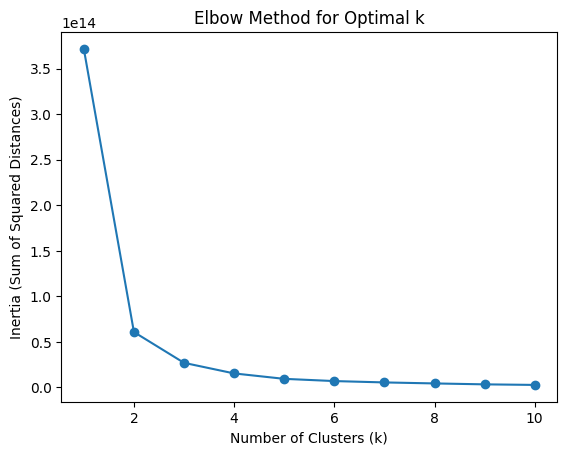

In [10]:
#determining the number of Steps for K means
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with standardized features
# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(onefinaldf)

# Store the sum of squared distances for different values of k
inertia_values = []

# Define a range of k values to try
k_values = range(1, 11)  # You can adjust the range based on your problem

# Apply k-means clustering for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(onefinaldf)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  onion laye

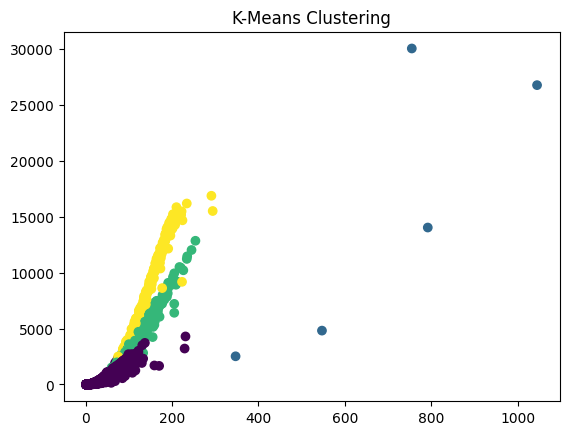

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(onefinaldf)

# Step 3: Apply k-means clustering
k = 4  # Replace with your optimal k
kmeans = KMeans(n_clusters=k, random_state=42)
onefinaldf['k=4_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(onefinaldf)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


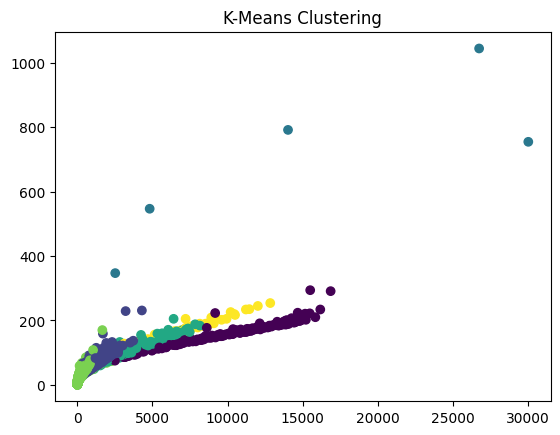

In [12]:
#Step 3: Apply k-means clustering
N = 6  # Replace with your optimal k
kmeans = KMeans(n_clusters=N, random_state=42)
onefinaldf['k = 6_Cluster'] = kmeans.fit_predict(features_standardized)


# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(onefinaldf["Common Connections"], onefinaldf['NodeDegree'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

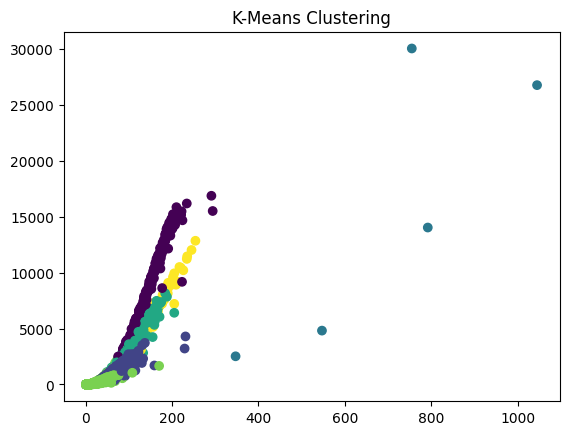

In [13]:
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

showing both for 4 clusters and 6 clusters in a same graph

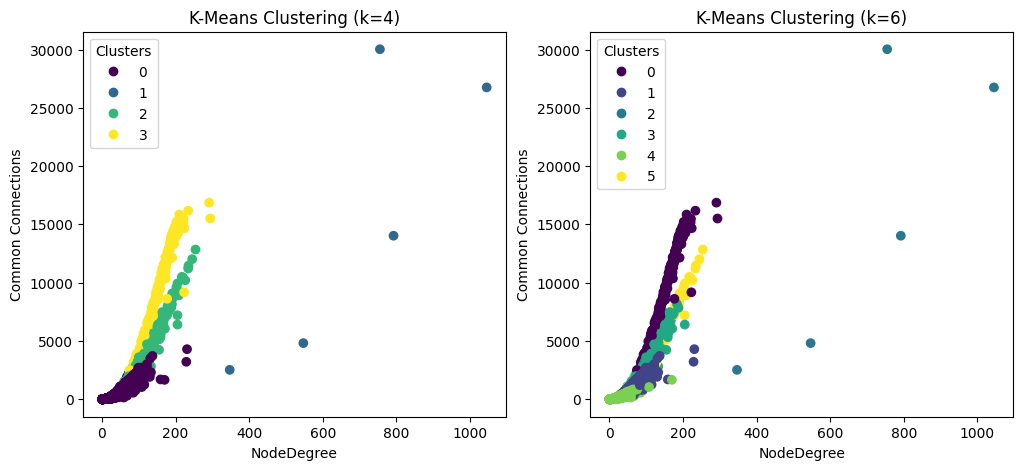

In [16]:
# Step 4: Visualize the clusters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for k=4 clusters
scatter_4 = axes[0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0].set_title(f'K-Means Clustering (k=4)')
axes[0].set_xlabel('NodeDegree')
axes[0].set_ylabel('Common Connections')
axes[0].legend(*scatter_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters
scatter_6 = axes[1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1].set_title(f'K-Means Clustering (k=6)')
axes[1].set_xlabel('NodeDegree')
axes[1].set_ylabel('Common Connections')
axes[1].legend(*scatter_6.legend_elements(), title='Clusters')


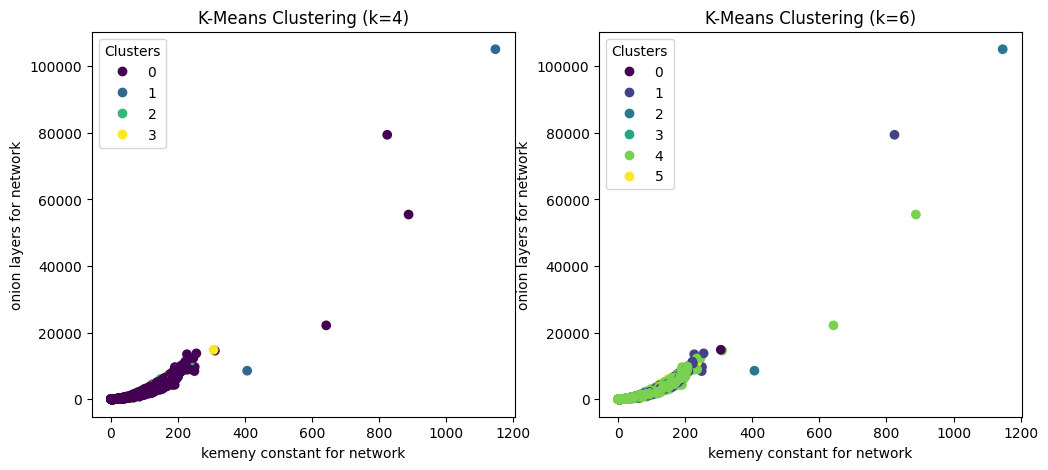

In [17]:
# visualize with kemeny constant - time and Onion layers of the network for clustering
# Step 4: Visualize the clusters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for k=4 clusters
scatter_4 = axes[0].scatter(onefinaldf["kemeny constant for network"], onefinaldf['onion layers for network'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0].set_title(f'K-Means Clustering (k=4)')
axes[0].set_xlabel('kemeny constant for network')
axes[0].set_ylabel('onion layers for network')
axes[0].legend(*scatter_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters
scatter_6 = axes[1].scatter(onefinaldf["kemeny constant for network"], onefinaldf['onion layers for network'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1].set_title(f'K-Means Clustering (k=6)')
axes[1].set_xlabel('kemeny constant for network')
axes[1].set_ylabel('onion layers for network')
axes[1].legend(*scatter_6.legend_elements(), title='Clusters')


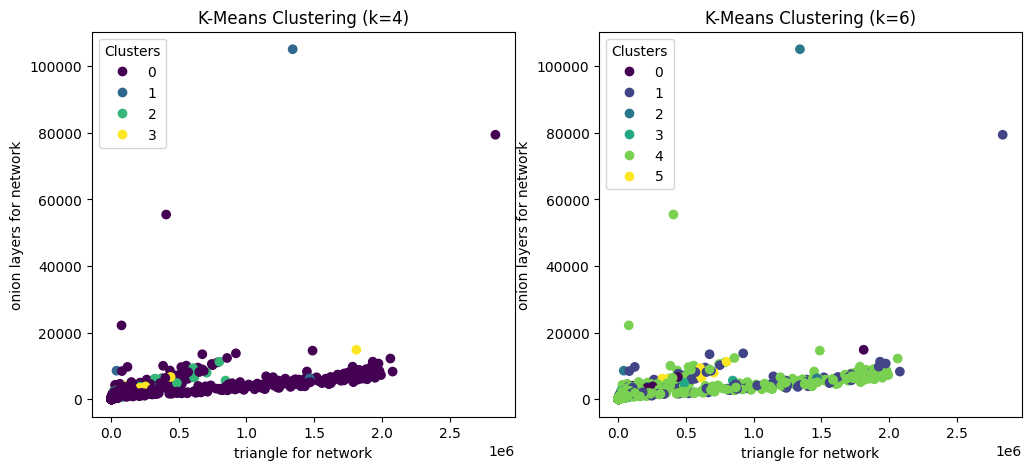

In [18]:
# visualize with No of triangle in the network and Onion layers of the network for clustering
# Step 4: Visualize the clusters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for k=4 clusters
scatter_4 = axes[0].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0].set_title(f'K-Means Clustering (k=4)')
axes[0].set_xlabel('triangle for network')
axes[0].set_ylabel('onion layers for network')
axes[0].legend(*scatter_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters
scatter_6 = axes[1].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1].set_title(f'K-Means Clustering (k=6)')
axes[1].set_xlabel('triangle for network')
axes[1].set_ylabel('onion layers for network')
axes[1].legend(*scatter_6.legend_elements(), title='Clusters')

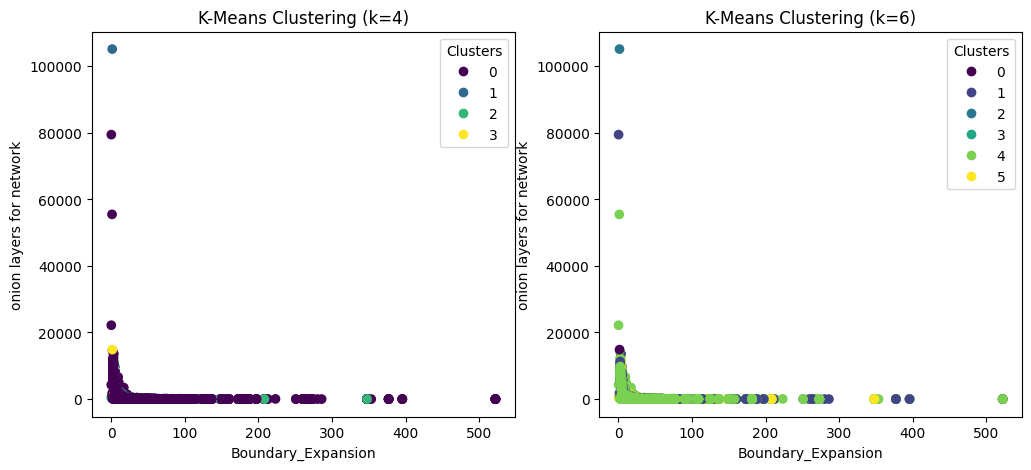

In [20]:
# visualize with Boundary Expansion of network and Onion layers of the network for clustering
# Step 4: Visualize the clusters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for k=4 clusters
scatter_4 = axes[0].scatter(onefinaldf["Boundary_Expansion"], onefinaldf['onion layers for network'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0].set_title(f'K-Means Clustering (k=4)')
axes[0].set_xlabel('Boundary_Expansion')
axes[0].set_ylabel('onion layers for network')
axes[0].legend(*scatter_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters
scatter_6 = axes[1].scatter(onefinaldf["Boundary_Expansion"], onefinaldf['onion layers for network'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1].set_title(f'K-Means Clustering (k=6)')
axes[1].set_xlabel('Boundary_Expansion')
axes[1].set_ylabel('onion layers for network')
axes[1].legend(*scatter_6.legend_elements(), title='Clusters')

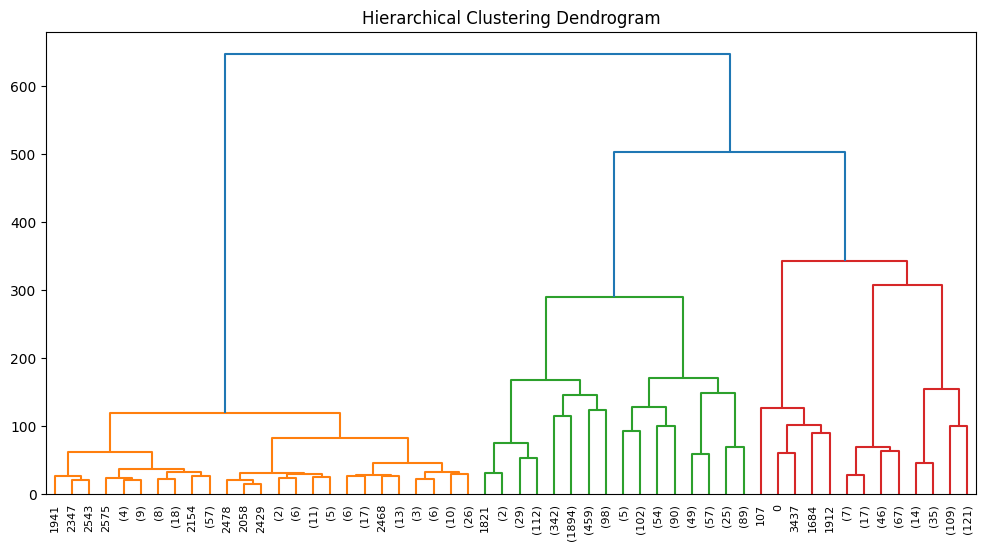

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  kemeny con

In [21]:
# Agglomerative Clustering
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage



# Step 1: Standardize the data (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(onefinaldf)

# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 4  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
onefinaldf['agg4Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(onefinaldf)


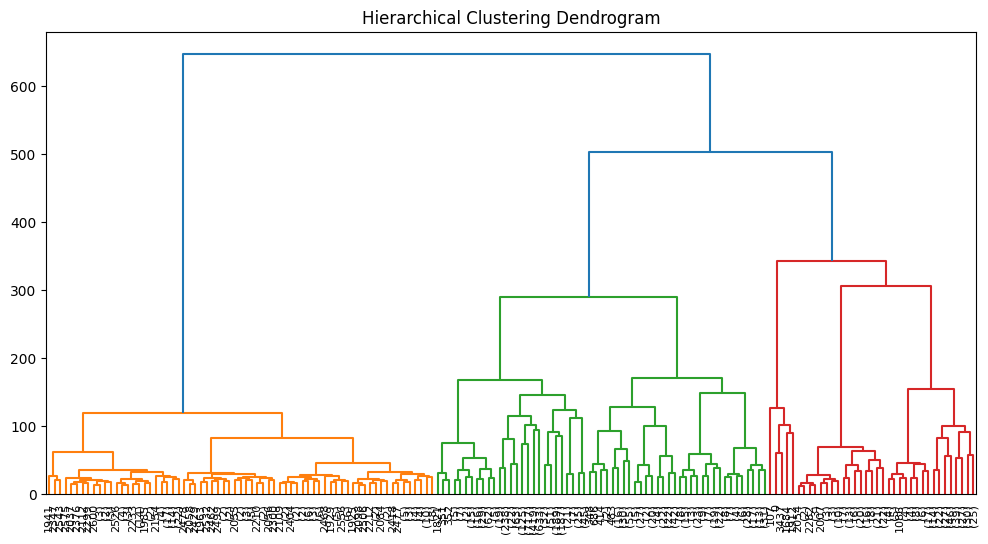

In [22]:
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=7)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
onefinaldf['agg6Cluster'] = hierarchical_clustering.fit_predict(data_standardized)


In [23]:
print(onefinaldf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  global_eff

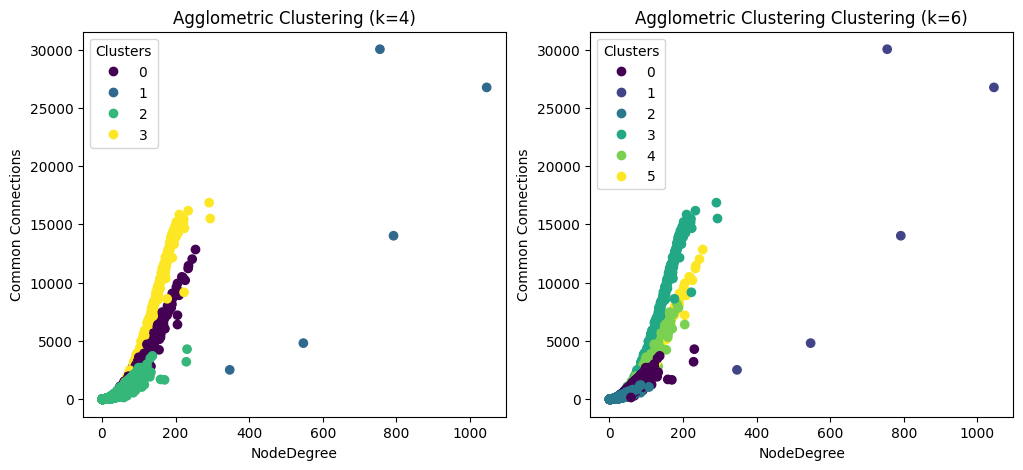

In [24]:
# Step 4: Visualize the clusters for agglometric clustering
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for k=4 clusters
scatter_4 = axes[0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg4Cluster'], cmap='viridis')
axes[0].set_title(f'Agglometric Clustering (k=4)')
axes[0].set_xlabel('NodeDegree')
axes[0].set_ylabel('Common Connections')
axes[0].legend(*scatter_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters
scatter_6 = axes[1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg6Cluster'], cmap='viridis')
axes[1].set_title(f'Agglometric Clustering Clustering (k=6)')
axes[1].set_xlabel('NodeDegree')
axes[1].set_ylabel('Common Connections')
axes[1].legend(*scatter_6.legend_elements(), title='Clusters')

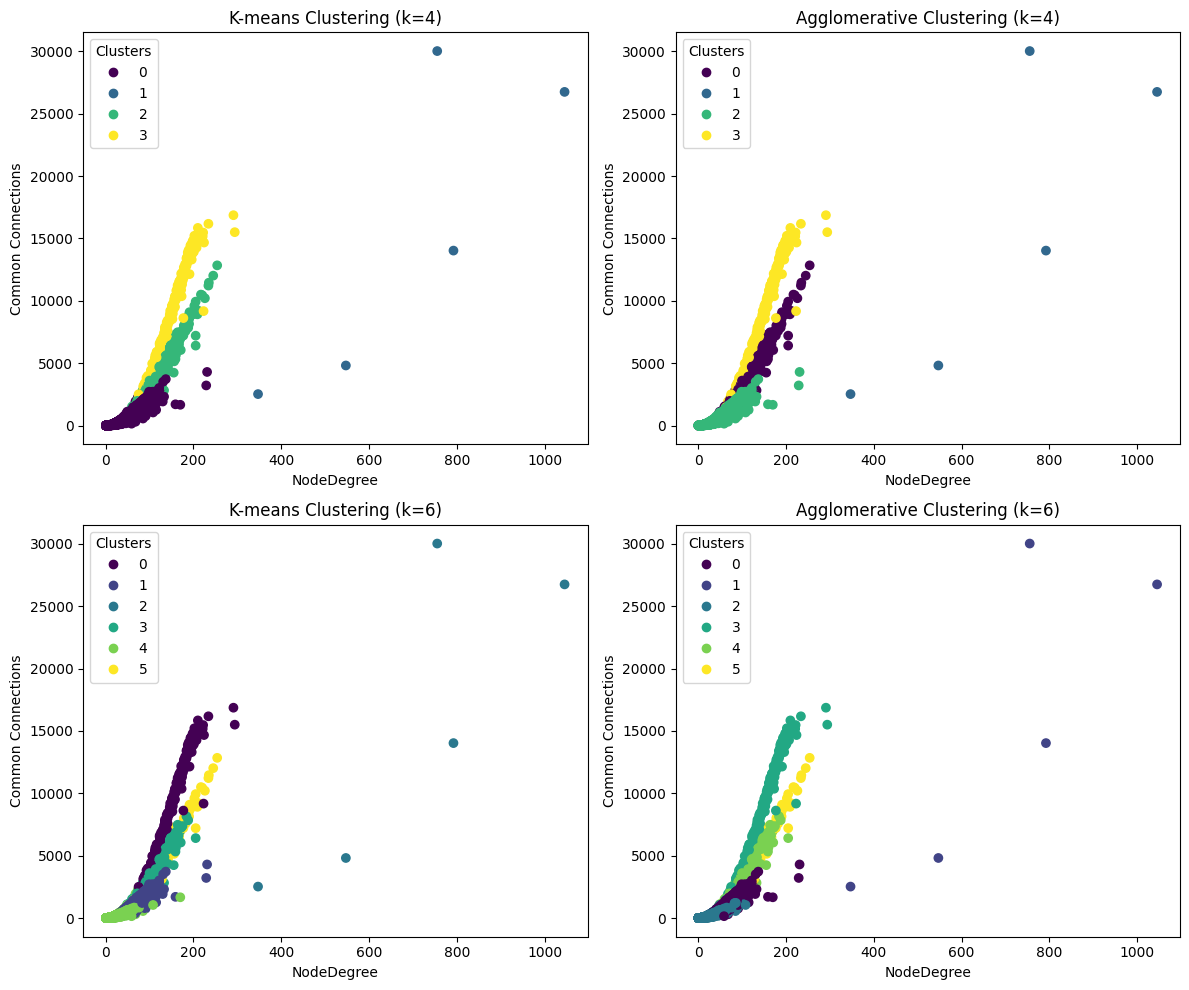

In [28]:
# Step 4: Visualize the clusters for k-means and agglomerative clustering
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot for k=4 clusters in k-means
scatter_4_kmeans = axes[0, 0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0, 0].set_title('K-means Clustering (k=4)')
axes[0, 0].set_xlabel('NodeDegree')
axes[0, 0].set_ylabel('Common Connections')
axes[0, 0].legend(*scatter_4_kmeans.legend_elements(), title='Clusters')

# Plot for k=4 clusters in agglomerative clustering
scatter_4_agg = axes[0, 1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg4Cluster'], cmap='viridis')
axes[0, 1].set_title('Agglomerative Clustering (k=4)')
axes[0, 1].set_xlabel('NodeDegree')
axes[0, 1].set_ylabel('Common Connections')
axes[0, 1].legend(*scatter_4_agg.legend_elements(), title='Clusters')

# Plot for k=6 clusters in k-means
scatter_6_kmeans = axes[1, 0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1, 0].set_title('K-means Clustering (k=6)')
axes[1, 0].set_xlabel('NodeDegree')
axes[1, 0].set_ylabel('Common Connections')
axes[1, 0].legend(*scatter_6_kmeans.legend_elements(), title='Clusters')

# Plot for k=6 clusters in agglomerative clustering
scatter_6_agg = axes[1, 1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg6Cluster'], cmap='viridis')
axes[1, 1].set_title('Agglomerative Clustering (k=6)')
axes[1, 1].set_xlabel('NodeDegree')
axes[1, 1].set_ylabel('Common Connections')
axes[1, 1].legend(*scatter_6_agg.legend_elements(), title='Clusters')

plt.tight_layout()
plt.show()


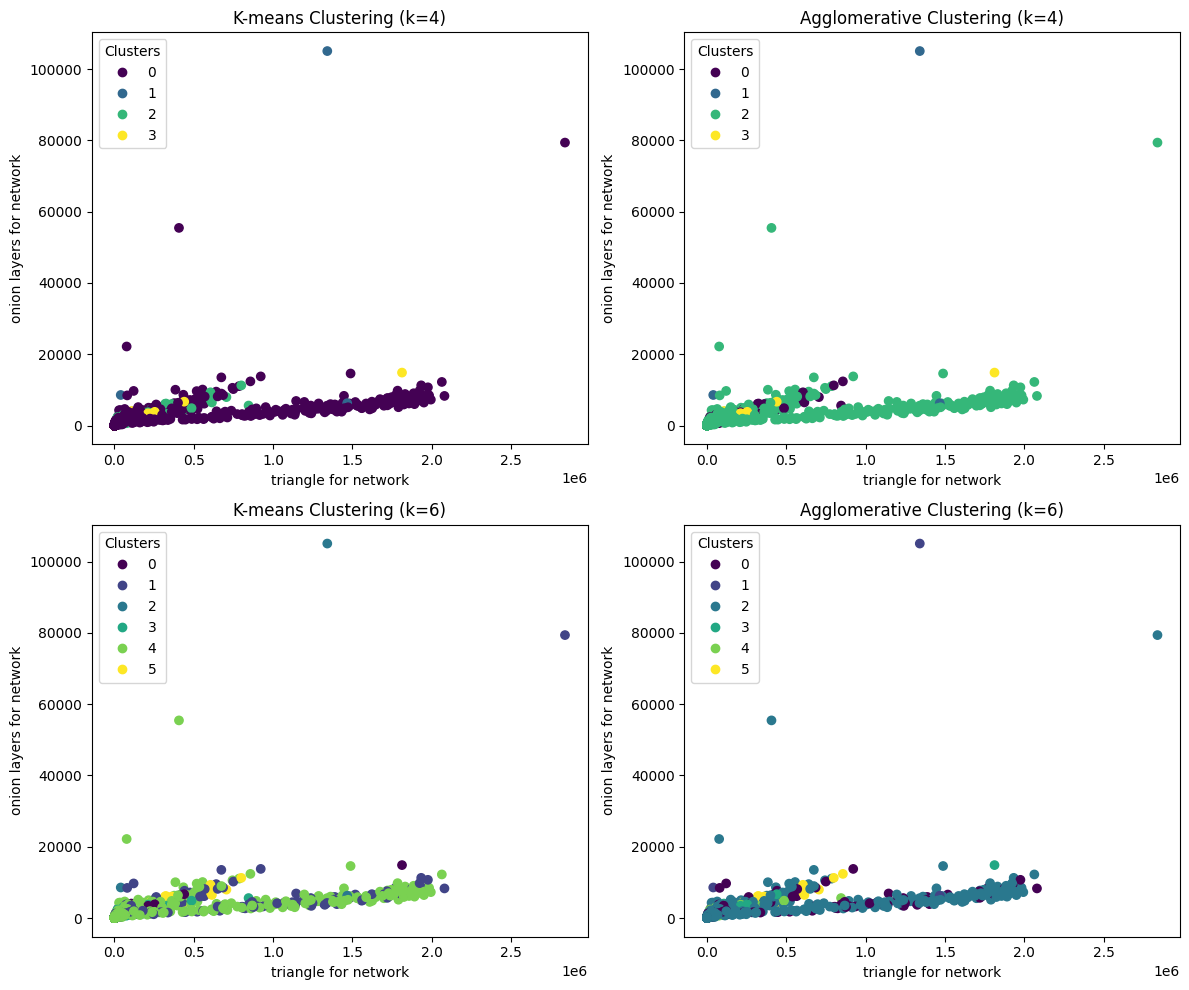

In [29]:
# visualize with No of triangle in the network and Onion layers of the network for both of the Clustering
# Step 4: Visualize the clusters for k-means and agglomerative clustering
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot for k=4 clusters in k-means
scatter_4_kmeans = axes[0, 0].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0, 0].set_title('K-means Clustering (k=4)')
axes[0, 0].set_xlabel('triangle for network')
axes[0, 0].set_ylabel('onion layers for network')
axes[0, 0].legend(*scatter_4_kmeans.legend_elements(), title='Clusters')

# Plot for k=4 clusters in agglomerative clustering
scatter_4_agg = axes[0, 1].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['agg4Cluster'], cmap='viridis')
axes[0, 1].set_title('Agglomerative Clustering (k=4)')
axes[0, 1].set_xlabel('triangle for network')
axes[0, 1].set_ylabel('onion layers for network')
axes[0, 1].legend(*scatter_4_agg.legend_elements(), title='Clusters')

# Plot for k=6 clusters in k-means
scatter_6_kmeans = axes[1, 0].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1, 0].set_title('K-means Clustering (k=6)')
axes[1, 0].set_xlabel('triangle for network')
axes[1, 0].set_ylabel('onion layers for network')
axes[1, 0].legend(*scatter_6_kmeans.legend_elements(), title='Clusters')

# Plot for k=6 clusters in agglomerative clustering
scatter_6_agg = axes[1, 1].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['agg6Cluster'], cmap='viridis')
axes[1, 1].set_title('Agglomerative Clustering (k=6)')
axes[1, 1].set_xlabel('triangle for network')
axes[1, 1].set_ylabel('onion layers for network')
axes[1, 1].legend(*scatter_6_agg.legend_elements(), title='Clusters')

plt.tight_layout()
plt.show()


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  max_weight

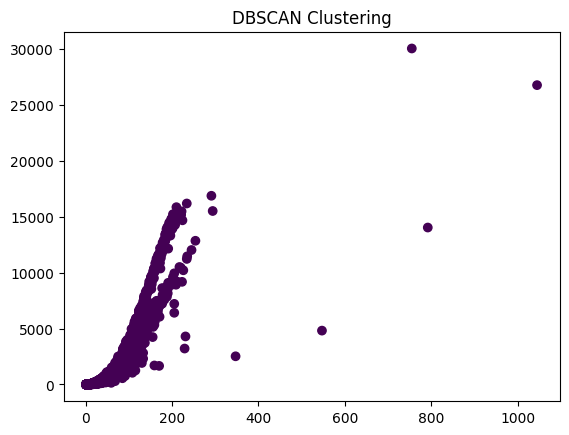

In [30]:
#dbscan algorithm
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Standardize the data (required for DBSCAN)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(onefinaldf)

# Step 2: Apply DBSCAN
# Choose appropriate values for `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other)
# and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=1, min_samples=20)
onefinaldf['dbs1Cluster'] = dbscan.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(onefinaldf)

# Step 3: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
plt.scatter(onefinaldf['NodeDegree'], onefinaldf['Common Connections'], c=onefinaldf['dbs1Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


we have to change eps and min samples value for the dbscan

In [33]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Choose a suitable value for k (number of neighbors)
k = 4

 #Compute pairwise distances between nodes
distances = nx.floyd_warshall_numpy(G)

# Choose a suitable value for k
k = 4

# Fit a nearest neighbors model
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(distances)

# Calculate distances to k-th nearest neighbors
distances_knn, _ = neigh.kneighbors(distances)

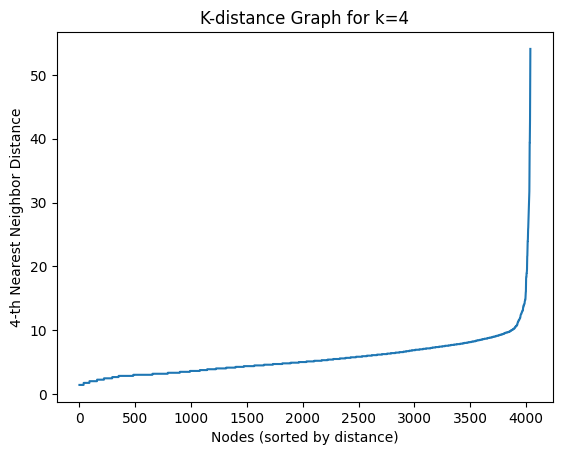

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Take the distances to the k-th nearest neighbors
distances_knn = np.max(distances_knn, axis=1)
distances_knn.sort()

# Plot the k-distance graph
plt.plot(distances_knn)
plt.xlabel('Nodes (sorted by distance)')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'K-distance Graph for k={k}')
plt.show()

so it is increasing sharply near 11 , so i will take eps value as 11

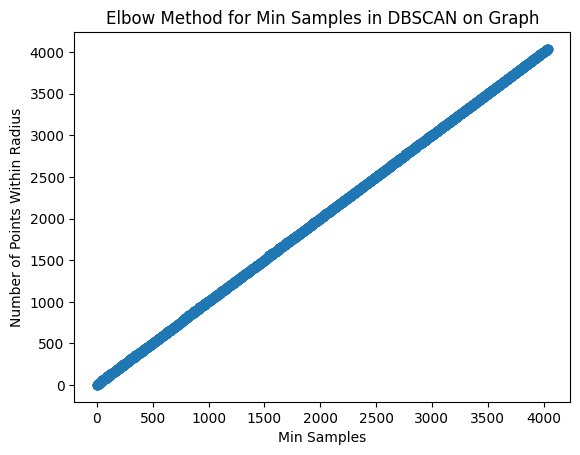

In [40]:
# Compute pairwise distances between nodes (you may use other metrics based on your problem)
distances1 = nx.floyd_warshall_numpy(G)

# Choose a suitable range of values for min_samples
min_samples_values = range(1, 4040)  # Adjust the range as needed

# Fit a nearest neighbors model
neigh = NearestNeighbors(n_neighbors=max(min_samples_values))
neigh.fit(distances1)

# Calculate distances to k-th nearest neighbors
distances_knn1, _ = neigh.kneighbors(distances)

# Sort the distances and calculate the number of points within each distance
distances_knn1 = np.max(distances_knn1, axis=1)
distances_knn1.sort()

num_points_within_radius = [np.sum(distances_knn1 <= d) for d in distances_knn1]

# Plot the elbow graph
plt.plot(min_samples_values, num_points_within_radius, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Number of Points Within Radius')
plt.title('Elbow Method for Min Samples in DBSCAN on Graph')
plt.show()

In [44]:
dbminvaluedf = onefinaldf.copy()
print(dbminvaluedf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  max_weight

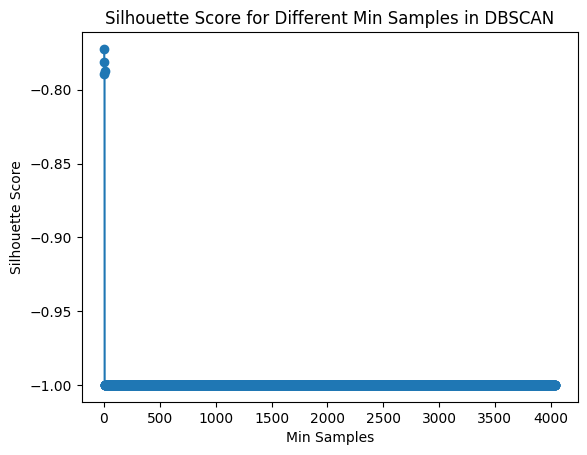

In [45]:
min_samples_values = range(2, 4040)  # Starting from 2, as silhouette_score requires at least 2 clusters

# List to store silhouette scores for different min_samples values
silhouette_scores = []

# Loop over min_samples values
for min_samples in min_samples_values:
    # Apply DBSCAN for each min_samples value
    labels = DBSCAN(eps=11, min_samples=min_samples).fit_predict(dbminvaluedf)

    # Check if there is more than one unique label
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        # Calculate silhouette score
        silhouette_scores.append(silhouette_score(dbminvaluedf, labels))
    else:
        # If only one label, append a placeholder value (e.g., -1)
        silhouette_scores.append(-1)

# Plot silhouette scores
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Min Samples in DBSCAN')
plt.show()

In [46]:
optimal_min_samples = min_samples_values[np.argmax(silhouette_scores)]
print(f'Optimal Min Samples: {optimal_min_samples}')

Optimal Min Samples: 2


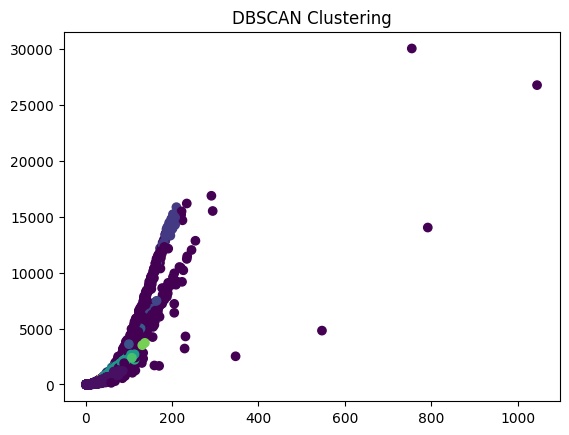

In [47]:
#dbscan algorithm
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Standardize the data (required for DBSCAN)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(onefinaldf)

# Step 2: Apply DBSCAN
# Choose appropriate values for `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other)
# and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=11, min_samples=2)
onefinaldf['dbsCluster'] = dbscan.fit_predict(data_standardized)


# Step 3: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
plt.scatter(onefinaldf['NodeDegree'], onefinaldf['Common Connections'], c=onefinaldf['dbsCluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


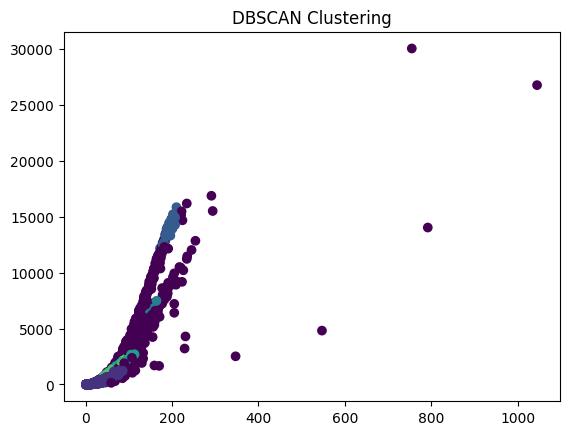

In [48]:
# Step 2: Apply DBSCAN
# Choose appropriate values for `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other)
# and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=11, min_samples=4)
onefinaldf['dbs4Cluster'] = dbscan.fit_predict(data_standardized)


# Step 3: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
plt.scatter(onefinaldf['NodeDegree'], onefinaldf['Common Connections'], c=onefinaldf['dbs4Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [49]:
# Step 2: Apply DBSCAN
# Choose appropriate values for `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other)
# and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=11, min_samples=6)
onefinaldf['dbs6Cluster'] = dbscan.fit_predict(data_standardized)


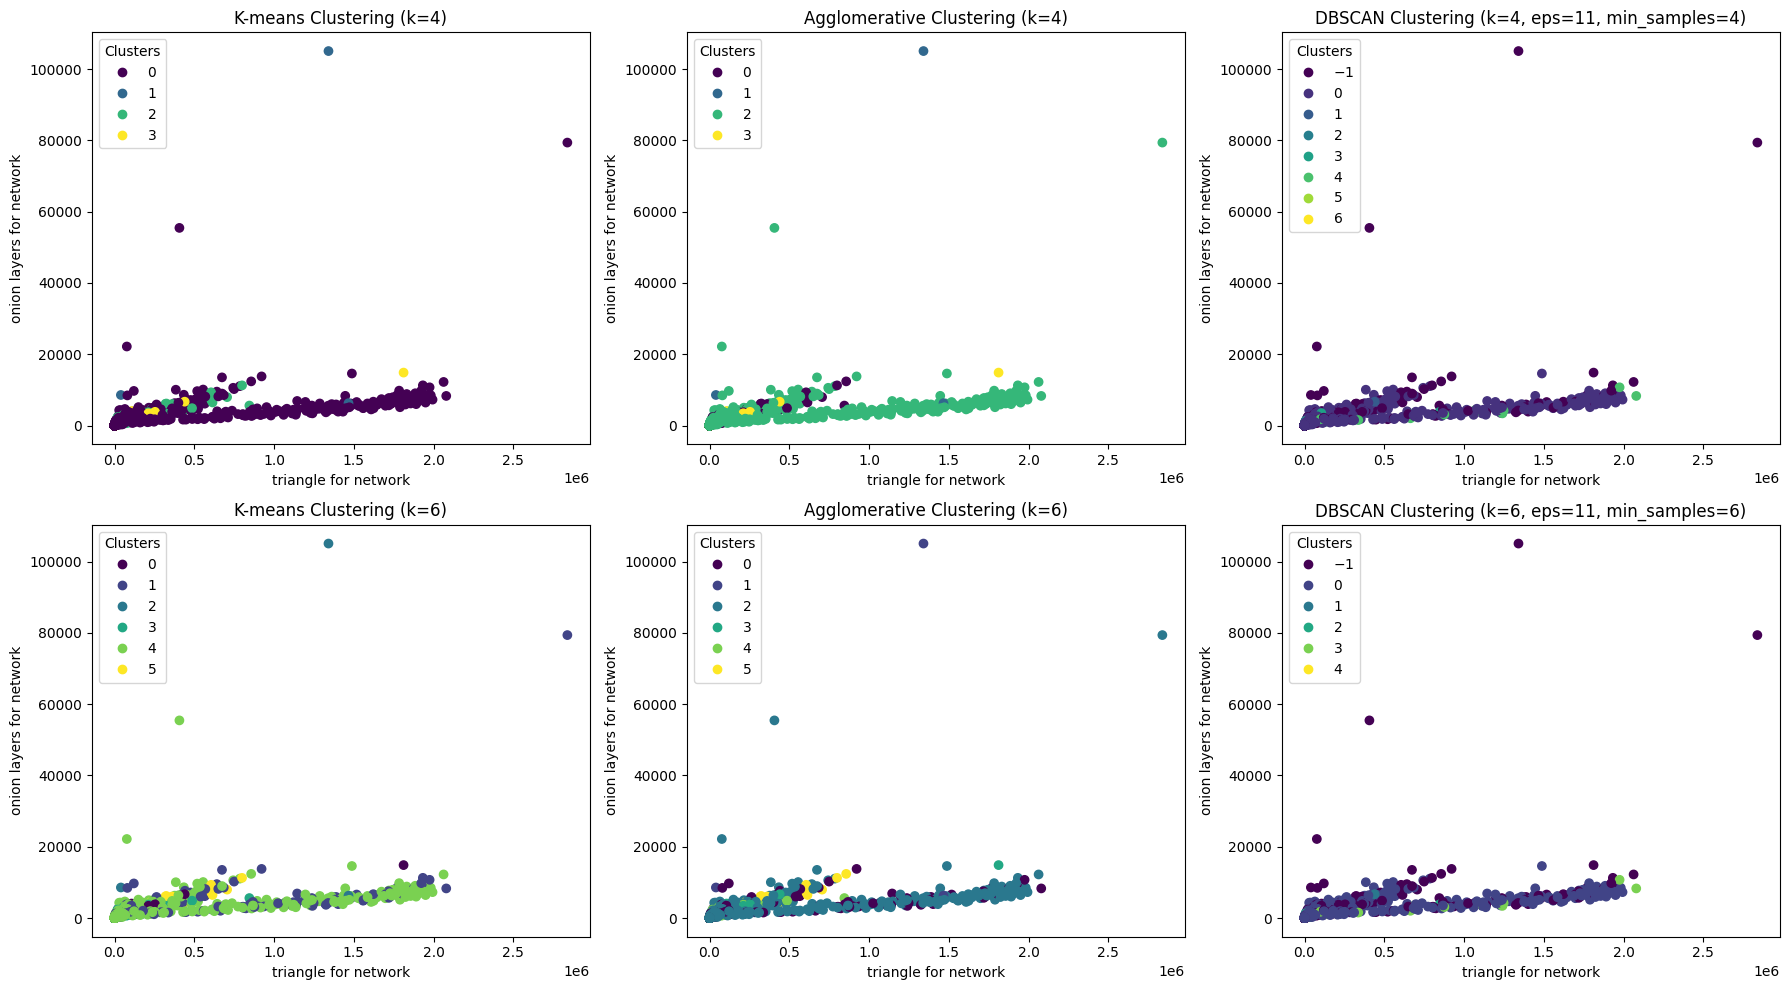

In [59]:
# Visualize clusters for k-means, agglomerative clustering, and DBSCAN in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot for k=4 clusters in k-means
scatter_4_kmeans = axes[0, 0].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0, 0].set_title('K-means Clustering (k=4)')
axes[0, 0].set_xlabel('triangle for network')
axes[0, 0].set_ylabel('onion layers for network')
axes[0, 0].legend(*scatter_4_kmeans.legend_elements(), title='Clusters')

# Plot for k=4 clusters in agglomerative clustering
scatter_4_agg = axes[0, 1].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['agg4Cluster'], cmap='viridis')
axes[0, 1].set_title('Agglomerative Clustering (k=4)')
axes[0, 1].set_xlabel('triangle for network')
axes[0, 1].set_ylabel('onion layers for network')
axes[0, 1].legend(*scatter_4_agg.legend_elements(), title='Clusters')

# Plot for k=6 clusters in k-means
scatter_6_kmeans = axes[1, 0].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1, 0].set_title('K-means Clustering (k=6)')
axes[1, 0].set_xlabel('triangle for network')
axes[1, 0].set_ylabel('onion layers for network')
axes[1, 0].legend(*scatter_6_kmeans.legend_elements(), title='Clusters')

# Plot for k=6 clusters in agglomerative clustering
scatter_6_agg = axes[1, 1].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['agg6Cluster'], cmap='viridis')
axes[1, 1].set_title('Agglomerative Clustering (k=6)')
axes[1, 1].set_xlabel('triangle for network')
axes[1, 1].set_ylabel('onion layers for network')
axes[1, 1].legend(*scatter_6_agg.legend_elements(), title='Clusters')

# Plot for DBSCAN clusters (k=4, eps=11, min_samples=5)
scatter_dbscan_4 = axes[0, 2].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['dbs4Cluster'], cmap='viridis')
axes[0, 2].set_title('DBSCAN Clustering (k=4, eps=11, min_samples=4)')
axes[0, 2].set_xlabel('triangle for network')
axes[0, 2].set_ylabel('onion layers for network')
axes[0, 2].legend(*scatter_dbscan_4.legend_elements(), title='Clusters')

# Plot for DBSCAN clusters (k=6, eps=0.8, min_samples=5)
scatter_dbscan_6 = axes[1, 2].scatter(onefinaldf["triangle for network"], onefinaldf['onion layers for network'], c=onefinaldf['dbs6Cluster'], cmap='viridis')
axes[1, 2].set_title('DBSCAN Clustering (k=6, eps=11, min_samples=6)')
axes[1, 2].set_xlabel('triangle for network')
axes[1, 2].set_ylabel('onion layers for network')
axes[1, 2].legend(*scatter_dbscan_6.legend_elements(), title='Clusters')

plt.tight_layout()
plt.show()


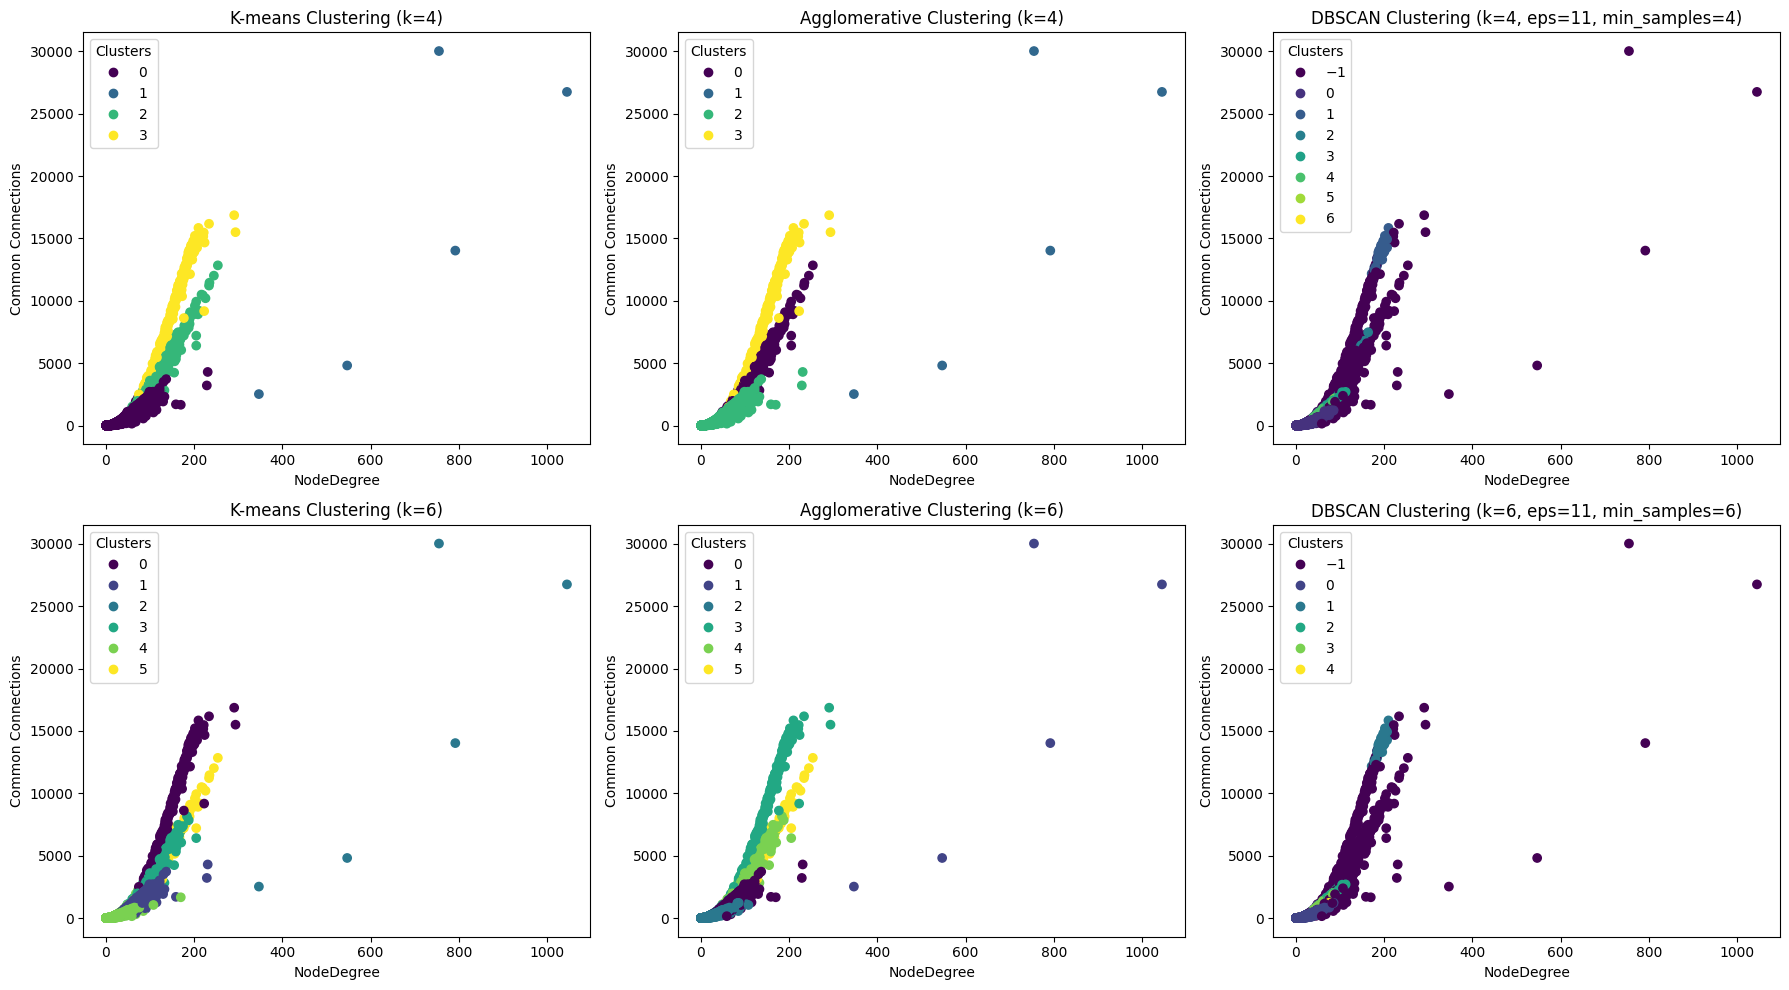

In [60]:
# Step 4: Visualize the clusters for k-means and agglomerative clustering
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot for k=4 clusters in k-means
scatter_4_kmeans = axes[0, 0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k=4_Cluster'], cmap='viridis')
axes[0, 0].set_title('K-means Clustering (k=4)')
axes[0, 0].set_xlabel('NodeDegree')
axes[0, 0].set_ylabel('Common Connections')
axes[0, 0].legend(*scatter_4_kmeans.legend_elements(), title='Clusters')

# Plot for k=4 clusters in agglomerative clustering
scatter_4_agg = axes[0, 1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg4Cluster'], cmap='viridis')
axes[0, 1].set_title('Agglomerative Clustering (k=4)')
axes[0, 1].set_xlabel('NodeDegree')
axes[0, 1].set_ylabel('Common Connections')
axes[0, 1].legend(*scatter_4_agg.legend_elements(), title='Clusters')

# Plot for DBSCAN clusters (k=4, eps=11, min_samples=5)
scatter_dbscan_4 = axes[0, 2].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['dbs4Cluster'], cmap='viridis')
axes[0, 2].set_title('DBSCAN Clustering (k=4, eps=11, min_samples=4)')
axes[0, 2].set_xlabel('NodeDegree')
axes[0, 2].set_ylabel('Common Connections')
axes[0, 2].legend(*scatter_dbscan_4.legend_elements(), title='Clusters')

# Plot for k=6 clusters in k-means
scatter_6_kmeans = axes[1, 0].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['k = 6_Cluster'], cmap='viridis')
axes[1, 0].set_title('K-means Clustering (k=6)')
axes[1, 0].set_xlabel('NodeDegree')
axes[1, 0].set_ylabel('Common Connections')
axes[1, 0].legend(*scatter_6_kmeans.legend_elements(), title='Clusters')

# Plot for k=6 clusters in agglomerative clustering
scatter_6_agg = axes[1, 1].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['agg6Cluster'], cmap='viridis')
axes[1, 1].set_title('Agglomerative Clustering (k=6)')
axes[1, 1].set_xlabel('NodeDegree')
axes[1, 1].set_ylabel('Common Connections')
axes[1, 1].legend(*scatter_6_agg.legend_elements(), title='Clusters')

# Plot for DBSCAN clusters (k=6, eps=0.8, min_samples=5)
scatter_dbscan_6 = axes[1, 2].scatter(onefinaldf["NodeDegree"], onefinaldf['Common Connections'], c=onefinaldf['dbs6Cluster'], cmap='viridis')
axes[1, 2].set_title('DBSCAN Clustering (k=6, eps=11, min_samples=6)')
axes[1, 2].set_xlabel('NodeDegree')
axes[1, 2].set_ylabel('Common Connections')
axes[1, 2].legend(*scatter_dbscan_6.legend_elements(), title='Clusters')

plt.tight_layout()
plt.show()


Metrics

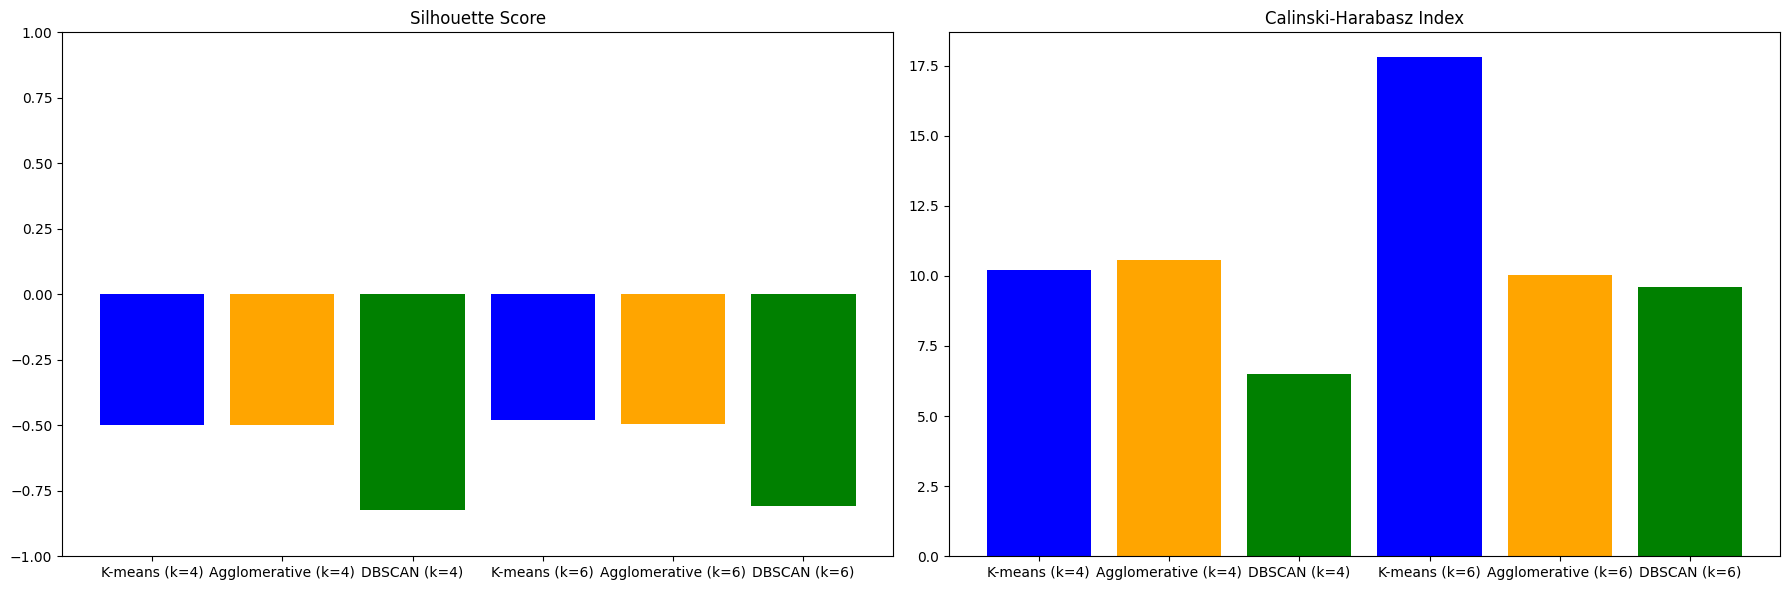

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Extract features
X = onefinaldf[['triangle for network', 'onion layers for network']]

# Extract cluster labels
kmeans_labels_4 = onefinaldf['k=4_Cluster']
agg_labels_4 = onefinaldf['agg4Cluster']
dbscan_labels_4 = onefinaldf['dbs4Cluster']

kmeans_labels_6 = onefinaldf['k = 6_Cluster']
agg_labels_6 = onefinaldf['agg6Cluster']
dbscan_labels_6 = onefinaldf['dbs6Cluster']

# Calculate Silhouette Score
kmeans_silhouette_4 = silhouette_score(X, kmeans_labels_4)
agg_silhouette_4 = silhouette_score(X, agg_labels_4)
dbscan_silhouette_4 = silhouette_score(X, dbscan_labels_4)

kmeans_silhouette_6 = silhouette_score(X, kmeans_labels_6)
agg_silhouette_6 = silhouette_score(X, agg_labels_6)
dbscan_silhouette_6 = silhouette_score(X, dbscan_labels_6)

# Calculate Calinski-Harabasz Index
kmeans_calinski_harabasz_4 = calinski_harabasz_score(X, kmeans_labels_4)
agg_calinski_harabasz_4 = calinski_harabasz_score(X, agg_labels_4)
dbscan_calinski_harabasz_4 = calinski_harabasz_score(X, dbscan_labels_4)

kmeans_calinski_harabasz_6 = calinski_harabasz_score(X, kmeans_labels_6)
agg_calinski_harabasz_6 = calinski_harabasz_score(X, agg_labels_6)
dbscan_calinski_harabasz_6 = calinski_harabasz_score(X, dbscan_labels_6)

# Data for plotting
algorithms = ['K-means (k=4)', 'Agglomerative (k=4)', 'DBSCAN (k=4)', 'K-means (k=6)', 'Agglomerative (k=6)', 'DBSCAN (k=6)']
silhouette_scores = [kmeans_silhouette_4, agg_silhouette_4, dbscan_silhouette_4, kmeans_silhouette_6, agg_silhouette_6, dbscan_silhouette_6]
calinski_harabasz_scores = [kmeans_calinski_harabasz_4, agg_calinski_harabasz_4, dbscan_calinski_harabasz_4, kmeans_calinski_harabasz_6, agg_calinski_harabasz_6, dbscan_calinski_harabasz_6]

# Plot Silhouette Score and Calinski-Harabasz Index
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot Silhouette Score
axes[0].bar(algorithms, silhouette_scores, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
axes[0].set_title('Silhouette Score')
axes[0].set_ylim(-1, 1)

# Plot Calinski-Harabasz Index
axes[1].bar(algorithms, calinski_harabasz_scores, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
axes[1].set_title('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


In [64]:
#Clustering via networkx Library
Clus = nx.clustering(G)

Clust = [round(value, 2) for value in Clus.values()]

# Create a DataFrame with a single column
cludf = pd.DataFrame({'library Clustering': Clust})

# Display the DataFrame
print(cludf)


      library Clustering
0                   0.04
1                   0.42
2                   0.89
3                   0.63
4                   0.87
...                  ...
4034                1.00
4035                0.00
4036                1.00
4037                0.67
4038                0.56

[4039 rows x 1 columns]


In [65]:
onefinaldf = pd.concat([onefinaldf, cludf], axis = 1)
print(onefinaldf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  triangle f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/loc

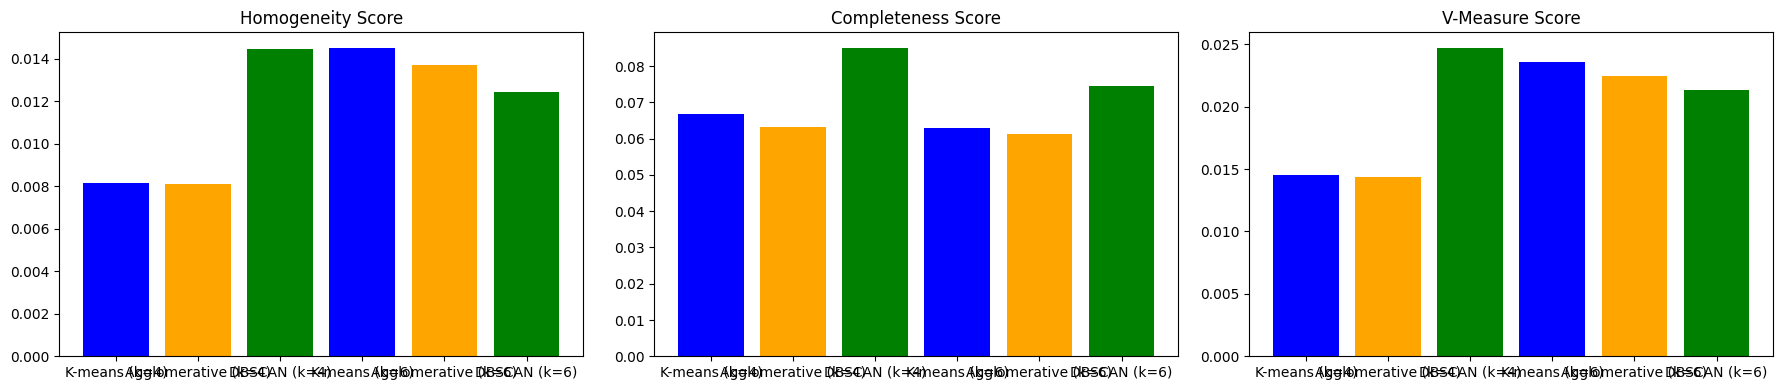

In [68]:
#comparing scores with networkx library clustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Extract cluster labels
kmeans_labels_4 = onefinaldf['k=4_Cluster']
agg_labels_4 = onefinaldf['agg4Cluster']
dbscan_labels_4 = onefinaldf['dbs4Cluster']

kmeans_labels_6 = onefinaldf['k = 6_Cluster']
agg_labels_6 = onefinaldf['agg6Cluster']
dbscan_labels_6 = onefinaldf['dbs6Cluster']

# Calculate scores for k=4 clusters
homogeneity_kmeans_4 = homogeneity_score(onefinaldf['library Clustering'], kmeans_labels_4)
completeness_kmeans_4 = completeness_score(onefinaldf['library Clustering'], kmeans_labels_4)
v_measure_kmeans_4 = v_measure_score(onefinaldf['library Clustering'], kmeans_labels_4)

homogeneity_agg_4 = homogeneity_score(onefinaldf['library Clustering'], agg_labels_4)
completeness_agg_4 = completeness_score(onefinaldf['library Clustering'], agg_labels_4)
v_measure_agg_4 = v_measure_score(onefinaldf['library Clustering'], agg_labels_4)

homogeneity_dbscan_4 = homogeneity_score(onefinaldf['library Clustering'], dbscan_labels_4)
completeness_dbscan_4 = completeness_score(onefinaldf['library Clustering'], dbscan_labels_4)
v_measure_dbscan_4 = v_measure_score(onefinaldf['library Clustering'], dbscan_labels_4)

# Calculate scores for k=6 clusters
homogeneity_kmeans_6 = homogeneity_score(onefinaldf['library Clustering'], kmeans_labels_6)
completeness_kmeans_6 = completeness_score(onefinaldf['library Clustering'], kmeans_labels_6)
v_measure_kmeans_6 = v_measure_score(onefinaldf['library Clustering'], kmeans_labels_6)

homogeneity_agg_6 = homogeneity_score(onefinaldf['library Clustering'], agg_labels_6)
completeness_agg_6 = completeness_score(onefinaldf['library Clustering'], agg_labels_6)
v_measure_agg_6 = v_measure_score(onefinaldf['library Clustering'], agg_labels_6)

homogeneity_dbscan_6 = homogeneity_score(onefinaldf['library Clustering'], dbscan_labels_6)
completeness_dbscan_6 = completeness_score(onefinaldf['library Clustering'], dbscan_labels_6)
v_measure_dbscan_6 = v_measure_score(onefinaldf['library Clustering'], dbscan_labels_6)

# Data for plotting
algorithms = ['K-means (k=4)', 'Agglomerative (k=4)', 'DBSCAN (k=4)', 'K-means (k=6)', 'Agglomerative (k=6)', 'DBSCAN (k=6)']
homogeneity_scores = [homogeneity_kmeans_4, homogeneity_agg_4, homogeneity_dbscan_4, homogeneity_kmeans_6, homogeneity_agg_6, homogeneity_dbscan_6]
completeness_scores = [completeness_kmeans_4, completeness_agg_4, completeness_dbscan_4, completeness_kmeans_6, completeness_agg_6, completeness_dbscan_6]
v_measure_scores = [v_measure_kmeans_4, v_measure_agg_4, v_measure_dbscan_4, v_measure_kmeans_6, v_measure_agg_6, v_measure_dbscan_6]

# Plot scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Plot Homogeneity Score
axes[0].bar(algorithms, homogeneity_scores, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
axes[0].set_title('Homogeneity Score')

# Plot Completeness Score
axes[1].bar(algorithms, completeness_scores, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
axes[1].set_title('Completeness Score')

# Plot V-Measure Score
axes[2].bar(algorithms, v_measure_scores, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
axes[2].set_title('V-Measure Score')

plt.tight_layout()
plt.show()


In [35]:
onefinaldf.to_csv('/content/drive/MyDrive/Colab Notebooks/onefinaldata.csv', index=False)


TWO HOP DATA

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations

twohopcommon_data = []

for node in range(500):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommond1f = pd.DataFrame(twohopcommon_data, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommond1f)

     Common Connections
0                 33343
1                  2849
2                  2856
3                  2849
4                  2856
..                  ...
495                3811
496                8264
497                8377
498                3780
499                3438

[500 rows x 1 columns]


In [ ]:
twohopcommond1f.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp1.csv', index=False)


In [71]:
path1 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp1.csv'
twohopcommon1 = pd.read_csv(path1)
print(twohopcommon1)

     Common Connections
0                 33343
1                  2849
2                  2856
3                  2849
4                  2856
..                  ...
495                3811
496                8264
497                8377
498                3780
499                3438

[500 rows x 1 columns]


In [ ]:
twohopcommon_data2 = []

for node in range(501, 1001):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data2.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf2 = pd.DataFrame(twohopcommon_data2, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf2)

     Common Connections
0                  3440
1                  4331
2                  7810
3                  4053
4                  3660
..                  ...
495               27916
496               27699
497               27786
498               27718
499               27779

[500 rows x 1 columns]


In [ ]:
twohopcommondf2.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp2.csv', index=False)

In [72]:
path2 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp2.csv'
twohopcommon2 = pd.read_csv(path2)
print(twohopcommon2)

     Common Connections
0                  3440
1                  4331
2                  7810
3                  4053
4                  3660
..                  ...
495               27916
496               27699
497               27786
498               27718
499               27779

[500 rows x 1 columns]


In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations

twohopcommon_data3 = []

for node in range(1001, 1501):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data3.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf3 = pd.DataFrame(twohopcommon_data3, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf3)

     Common Connections
0                 29826
1                 27791
2                 27700
3                 27675
4                 27781
..                  ...
495               27932
496               27766
497               27789
498               27783
499               27766

[500 rows x 1 columns]


In [ ]:
twohopcommondf3.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp3.csv', index=False)


In [73]:
path3 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp3.csv'
twohopcommon3 = pd.read_csv(path3)
print(twohopcommon3)

     Common Connections
0                 29826
1                 27791
2                 27700
3                 27675
4                 27781
..                  ...
495               27932
496               27766
497               27789
498               27783
499               27766

[500 rows x 1 columns]


In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
twohopcommon_data4 = []

for node in range(1501, 2001):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data4.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf4 = pd.DataFrame(twohopcommon_data4, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf4)


twohopcommondf4.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp4.csv', index=False)


In [ ]:
twohopcommondf4.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp4.csv', index=False)


In [74]:
path4 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp4.csv'
twohopcommon4 = pd.read_csv(path4)
print(twohopcommon4)

     Common Connections
0                 27777
1                 27725
2                 27767
3                 27737
4                 42496
..                  ...
495               30776
496               30645
497               30851
498               30746
499               30747

[500 rows x 1 columns]


In [ ]:
twohopcommon_data5 = []

for node in range(2001, 2501):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data5.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf5 = pd.DataFrame(twohopcommon_data5, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf5)

twohopcommondf5.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp5.csv', index=False)


In [ ]:
twohopcommondf5.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp5.csv', index=False)


In [76]:
path5 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp5.csv'
twohopcommon5 = pd.read_csv(path5)
print(twohopcommon5)

     Common Connections
0                 30845
1                 30729
2                 31117
3                 30855
4                 30625
..                  ...
495               30796
496               30755
497               31239
498               30687
499               30599

[500 rows x 1 columns]


In [ ]:
twohopcommon_data6 = []

for node in range(2501, 3001):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data6.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf6 = pd.DataFrame(twohopcommon_data6, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf6)


In [ ]:
twohopcommondf6.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp6.csv', index=False)


In [77]:
path6 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp6.csv'
twohopcommon6 = pd.read_csv(path6)
print(twohopcommon6)

     Common Connections
0                 30742
1                 30897
2                 30764
3                 30629
4                 30775
..                  ...
495               14778
496               14803
497               14814
498               14826
499               14726

[500 rows x 1 columns]


In [ ]:
twohopcommon_data7 = []

for node in range(3001, 3501):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data7.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf7 = pd.DataFrame(twohopcommon_data7, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf7)


In [ ]:
twohopcommondf7.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp7.csv', index=False)


In [ ]:
path7 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp7.csv'
twohopcommon7 = pd.read_csv(path7)
print(twohopcommon7)

In [ ]:
twohopcommon_data8 = []

for node in range(3501, len(G)):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)


    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    twohopcommon_data8.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
twohopcommondf8 = pd.DataFrame(twohopcommon_data8, columns=["Common Connections"])

# Display the DataFrame
print(twohopcommondf8)

twohopcommondf8.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp8.csv', index=False)


In [ ]:
twohopcommondf8.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopcommonp8.csv', index=False)


In [81]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twohopcommonp8.csv'
twohopcommon8 = pd.read_csv(path8)
print(twohopcommon8)

     Common Connections
0                  5588
1                  5352
2                  5347
3                  5352
4                  5335
..                  ...
533                 203
534                 204
535                 203
536                 201
537                 196

[538 rows x 1 columns]


In [82]:
twohopcommondf = pd.concat([twohopcommon1, twohopcommon2, twohopcommon3, twohopcommon4, twohopcommon5, twohopcommon6, twohopcommon7, twohopcommon8], axis=0, ignore_index=True)
print(twohopcommondf)

      Common Connections
0                  33343
1                   2849
2                   2856
3                   2849
4                   2856
...                  ...
4033                 203
4034                 204
4035                 203
4036                 201
4037                 196

[4038 rows x 1 columns]


In [ ]:
import pandas as pd
#near degree data
twodegree_data = []

for node in range(len(G)):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)

    for j in acData:
        M =G.degree(j)
        abData.append(M)

    twodegree_data.append(abData)  # Append a new list as a row to all_data

# Create a DataFrame from the list of lists
twodegreedf = pd.DataFrame(twodegree_data, columns= [f'{i} degree connections' for i in range(1, 2916)])

# Display the DataFrame
print(twodegreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                    10                    17   
1                      347                    10                    17   
2                      347                    17                    17   
3                      347                    17                    10   
4                      347                    17                    10   
...                    ...                   ...                   ...   
4034                     8                    59                     8   
4035                     8                    59                     8   
4036                     8                    59                     8   
4037                     8                    59                     8   
4038                     8                    59                     8   

      4 degree connections  5 degree connections  6 degree connections  \
0                       10           

In [ ]:
#transforming degree data by adding all the degree and counting for a specific degree

# Assuming you have a list of 100 values named values_to_count
values_to_count = range(1046)  # Replace ... with the actual values

# Add columns for each value in values_to_count
for value in values_to_count:
    column_name = f'{value}_count'
    twodegreedf[column_name] = twodegreedf.apply(lambda row: row.eq(value).sum(), axis=1)

print(twodegreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                    10                    17   
1                      347                    10                    17   
2                      347                    17                    17   
3                      347                    17                    10   
4                      347                    17                    10   
...                    ...                   ...                   ...   
4034                     8                    59                     8   
4035                     8                    59                     8   
4036                     8                    59                     8   
4037                     8                    59                     8   
4038                     8                    59                     8   

      4 degree connections  5 degree connections  6 degree connections  \
0                       10           

In [ ]:
twohopdegreedf = twodegreedf.drop(twodegreedf.columns[:2915], axis=1)
#dropping columns in degreedf
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[793:1045], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[756:792], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[548:755], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[348:547], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[295:347], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[292:294], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[255:291], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[246:254], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[236:245], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[232:234], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[230:231], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[227:229], axis=1)
twohopdegreedf = twohopdegreedf.drop(twohopdegreedf.columns[225:226], axis=1)
# Display the DataFrame after dropping columns
print(twohopdegreedf)

      0_count  1_count  2_count  3_count  4_count  5_count  6_count  7_count  \
0           0       25       45       38       35       38       32       30   
1           0       14       27       22       17       12       15       18   
2           0       14       27       22       17       12       15       18   
3           0       14       27       22       17       12       15       18   
4           0       14       27       22       17       12       15       18   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4034        0        7        9        4        9        1        4        5   
4035        0        6       10        4        9        1        5        4   
4036        0        7        9        4        9        1        4        5   
4037        0        7       10        4        8        1        4        5   
4038        0        7       10        4        9        1        4        5   

      8_count  9_count  ...  235_count 

In [ ]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twohopdegreedf.csv'
twohopdegreedf = pd.read_csv(path8)
print(twohopdegreedf)

In [ ]:
import pandas as pd
import networkx as nx

twodcData = []

for node in G.nodes():
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the average neighbor degree for the subgraph
    average_neighbor_degree = nx.average_neighbor_degree(subgraph)

    # Round the values to 2 decimal places
    average_degrees = {k: round(v, 2) for k, v in average_neighbor_degree.items()}

    # Sum the average degrees
    B = sum(average_degrees.values())

    twodcData.append(B)

# Create a DataFrame with a single column
twoadcdf = pd.DataFrame({'Average Degree Connectivity for network': twodcData})

# Display the DataFrame
print(twoadcdf)

In [ ]:
twohopdegreedf.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopdegreedf.csv', index=False)
twoadcdf.to_csv('/content/drive/MyDrive/Colab Notebooks/twoadcdf.csv', index=False)


In [ ]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twoadcdf.csv'
twoadcdf = pd.read_csv(path8)
print(twoadcdf)

In [ ]:
twonode_bridge_counts = {}

# Iterate over nodes from 0 to (number of nodes - 1)
for node in range(len(G)):
    # Create a subgraph containing only the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate local bridges for the subgraph
    local_bridges = list(nx.local_bridges(subgraph, with_span=False))

    # Count the number of bridges for the current node
    bridge_count = len(local_bridges)

    # Store the result in the dictionary
    twonode_bridge_counts[node] = bridge_count



# Convert the dictionary to a DataFrame
twohopbrdf = pd.DataFrame(list(twonode_bridge_counts.values()), columns=['Bridge_Count'])

# Display the DataFrame
print(twohopbrdf)

      Bridge_Count
0               26
1               14
2               14
3               14
4               14
...            ...
4034             7
4035             7
4036             7
4037             7
4038             7

[4039 rows x 1 columns]


In [ ]:
twohopbrdf.to_csv('/content/drive/MyDrive/Colab Notebooks/twohopbrdf.csv', index=False)


In [85]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twohopbrdf.csv'
twohopbrdf = pd.read_csv(path8)
print(twohopbrdf)

      Bridge_Count
0               26
1               14
2               14
3               14
4               14
...            ...
4034             7
4035             7
4036             7
4037             7
4038             7

[4039 rows x 1 columns]


In [ ]:
#Returns the boundary expansion of the set S.

#The boundary expansion is the quotient of the size of the node boundary and the cardinality of S. [1]
twoboundary_expansion_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)
    # Calculate the boundary expansion for the current node
    boundary_expansion = nx.boundary_expansion(G, subgraph)

    # Append the boundary expansion to the list
    twoboundary_expansion_list.append(boundary_expansion)

# Create a DataFrame from the list
twobounddf = pd.DataFrame({'Boundary_Expansion': twoboundary_expansion_list})

# Display the DataFrame
print(twobounddf)
twobounddf.to_csv('/content/drive/MyDrive/Colab Notebooks/twobounddf.csv', index=False)


      Boundary_Expansion
0               1.146807
1               3.364943
2               3.364943
3               3.364943
4               3.364943
...                  ...
4034            0.066667
4035            0.066667
4036            0.066667
4037            0.066667
4038            0.066667

[4039 rows x 1 columns]


In [86]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twobounddf.csv'
twobounddf = pd.read_csv(path8)
print(twobounddf)

      Boundary_Expansion
0               1.146807
1               3.364943
2               3.364943
3               3.364943
4               3.364943
...                  ...
4034            0.066667
4035            0.066667
4036            0.066667
4037            0.066667
4038            0.066667

[4039 rows x 1 columns]


In [ ]:
#The average global efficiency of a graph is the average efficiency of all pairs of nodes
import pandas as pd
import networkx as nx
from itertools import combinations

twoglobaleff_list = []
twoweight_matching_list = []
tworandom_list = []
panther_list = []
# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the boundary expansion for the current node
    globaleff = nx.global_efficiency(subgraph)

    weighteff = len(list(nx.max_weight_matching(subgraph, maxcardinality=False, weight='weight')))

    result = nx.non_randomness(subgraph, k=None, weight='weight')
    second_value = result[1]

    #panther = len(nx.panther_similarity(subgraph, 0, k=5, path_length=5, c=0.5, delta=0.1, eps=None, weight='weight'))

    # Append the boundary expansion to the list
    twoglobaleff_list.append(globaleff)
    twoweight_matching_list.append(weighteff)
    tworandom_list.append(second_value)
    #panther_list.append(panther)
# Create a DataFrame from the list
twoglobaldf = pd.DataFrame({
    'global_efficiency': twoglobaleff_list,
    'max_weight_matching': twoweight_matching_list,
    'random_probability': tworandom_list,
    # 'panther_similarity': panther_list  # Uncomment if needed
})
# Display the DataFrame
print(twoglobaldf)

twoglobaldf.to_csv('/content/drive/MyDrive/Colab Notebooks/twoglobaldf.csv', index=False)

      global_efficiency  max_weight_matching  random_probability
0              0.435346                  744          -66.852262
1              0.523734                  164           75.626117
2              0.523734                  164           75.626117
3              0.523734                  164           75.626117
4              0.523734                  164           75.626117
...                 ...                  ...                 ...
4034           0.557910                   26           10.139742
4035           0.557910                   26           10.139742
4036           0.557910                   26           10.139742
4037           0.557910                   26           10.139742
4038           0.557910                   26           10.139742

[4039 rows x 3 columns]


In [87]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twoglobaldf.csv'
twoglobaldf = pd.read_csv(path8)
print(twoglobaldf)

      global_efficiency  max_weight_matching  random_probability
0              0.435346                  744          -66.852262
1              0.523734                  164           75.626117
2              0.523734                  164           75.626117
3              0.523734                  164           75.626117
4              0.523734                  164           75.626117
...                 ...                  ...                 ...
4034           0.557910                   26           10.139742
4035           0.557910                   26           10.139742
4036           0.557910                   26           10.139742
4037           0.557910                   26           10.139742
4038           0.557910                   26           10.139742

[4039 rows x 3 columns]


In [ ]:
#The Kemeny constant measures the time needed for spreading across a graph. Low values indicate a closely connected graph whereas high values indicate a spread-out graph.
twokemeny_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the boundary expansion for the current node
    kemeny = nx.kemeny_constant(subgraph)

    # Append the boundary expansion to the list
    twokemeny_list.append(kemeny)

# Create a DataFrame from the list
twokemenydf = pd.DataFrame({'kemeny constant for network': twokemeny_list})

# Display the DataFrame
print(twokemenydf)

twokemenydf.to_csv('/content/drive/MyDrive/Colab Notebooks/twokemenydf.csv', index=False)

      kemeny constant for network
0                     2030.583502
1                      406.232390
2                      406.232390
3                      406.232390
4                      406.232390
...                           ...
4034                    68.707931
4035                    68.707931
4036                    68.707931
4037                    68.707931
4038                    68.707931

[4039 rows x 1 columns]


In [88]:
path8 = '/content/drive/MyDrive/Colab Notebooks/twokemenydf.csv'
twokemenydf = pd.read_csv(path8)
print(twokemenydf)

      kemeny constant for network
0                     2030.583502
1                      406.232390
2                      406.232390
3                      406.232390
4                      406.232390
...                           ...
4034                    68.707931
4035                    68.707931
4036                    68.707931
4037                    68.707931
4038                    68.707931

[4039 rows x 1 columns]


In [92]:
twokcore_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate local bridges for the subgraph
    k_core = nx.core_number(subgraph)
    B = sum(list(k_core.values()))


    twokcore_counts.append(B)

# Convert the list to a DataFrame
twohopkkcoredf = pd.DataFrame({'K-core for network': twokcore_counts})

# Display the DataFrame
print(twohopkkcoredf)

      K-core for network
0                  40653
1                   3400
2                   3400
3                   3400
4                   3400
...                  ...
4034                 255
4035                 255
4036                 255
4037                 255
4038                 255

[4039 rows x 1 columns]


In [69]:
twotriangle_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate local bridges for the subgraph
    triangle = nx.triangles(subgraph, nodes=None)
    B = sum(list(triangle.values()))

    twotriangle_counts.append(B)

# Convert the list to a DataFrame
twohopktriangledf = pd.DataFrame({'triangle for network': twotriangle_counts})

# Display the DataFrame
print(twohopktriangledf)

      triangle for network
0                  1514841
1                    39777
2                    39777
3                    39777
4                    39777
...                    ...
4034                   942
4035                   942
4036                   942
4037                   942
4038                   942

[4039 rows x 1 columns]


In [89]:
#getting all the necessary data from one hop for the Node Data
selected_columns = ['Node', 'NodeDegree', 'Average Degree Connectivity for Node', 'Core_Number', 'onion layers', 'eccentricity', 'No of triangles with Node']

# Creating a new DataFrame with the selected columns
commonhopdf = onefinaldf[selected_columns]

# Display the new DataFrame
print(commonhopdf)

      Node  NodeDegree  Average Degree Connectivity for Node  Core_Number  \
0        0         347                                 18.96           21   
1        1          17                                 48.24           13   
2        2          10                                 49.90            9   
3        3          17                                 59.76           13   
4        4          10                                 42.60            9   
...    ...         ...                                   ...          ...   
4034  4034           2                                 38.50            2   
4035  4035           1                                 59.00            1   
4036  4036           2                                 31.50            2   
4037  4037           4                                 23.25            4   
4038  4038           9                                 15.22            5   

      onion layers  eccentricity  No of triangles with Node  
0            

In [ ]:
twoonion_counts = []

# Iterate over nodes from 0 to (number of nodes - 1)
for node in G.nodes():
    # Create a subgraph containing only the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=2)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate local bridges for the subgraph
    k_core = nx.onion_layers(subgraph)
    sorted_keys = sorted(k_core.values())

    B = sum(list(sorted_keys))

    twoonion_counts.append(B)

# Convert the list to a DataFrame
twooniondf = pd.DataFrame({'onion layers for network': twoonion_counts})

# Display the DataFrame
print(twooniondf)

In [93]:
#Adding the twohop data
twohopdatadf = pd.concat([commonhopdf, twohopcommondf, twohopdegreedf, twoadcdf, twooniondf, twohopbrdf, twobounddf, twoglobaldf, twokemenydf, twohopkkcoredf,twohopktriangledf], axis=1)
print(twohopdatadf)

      Node  NodeDegree  Average Degree Connectivity for Node  Core_Number  \
0        0         347                                 18.96           21   
1        1          17                                 48.24           13   
2        2          10                                 49.90            9   
3        3          17                                 59.76           13   
4        4          10                                 42.60            9   
...    ...         ...                                   ...          ...   
4034  4034           2                                 38.50            2   
4035  4035           1                                 59.00            1   
4036  4036           2                                 31.50            2   
4037  4037           4                                 23.25            4   
4038  4038           9                                 15.22            5   

      onion layers  eccentricity  No of triangles with Node  \
0           

Three Hop

In [ ]:
import pandas as pd
#near degree data
threedegree_data = []

for node in range(len(G)):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    if node in acData:
      acData.remove(node)

    for j in acData:
        M =G.degree(j)
        abData.append(M)

    threedegree_data.append(abData)  # Append a new list as a row to all_data

# Create a DataFrame from the list of lists
threedegreedf = pd.DataFrame(threedegree_data, columns= [f'{i} degree connections' for i in range(1, 3833)])

# Display the DataFrame
print(threedegreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                    10                    17   
1                      347                    10                    17   
2                      347                    17                    17   
3                      347                    17                    10   
4                      347                    17                    10   
...                    ...                   ...                   ...   
4034                   159                   115                    91   
4035                   159                   115                    91   
4036                   159                   115                    91   
4037                   159                   115                    91   
4038                   159                   115                    91   

      4 degree connections  5 degree connections  6 degree connections  \
0                       10           

In [ ]:
#transforming degree data by adding all the degree and counting for a specific degree

# Assuming you have a list of 100 values named values_to_count
values_to_count = range(1046)  # Replace ... with the actual values

# Add columns for each value in values_to_count
for value in values_to_count:
    column_name = f'{value}_count'
    threedegreedf[column_name] = threedegreedf.apply(lambda row: row.eq(value).sum(), axis=1)

print(threedegreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                    10                    17   
1                      347                    10                    17   
2                      347                    17                    17   
3                      347                    17                    10   
4                      347                    17                    10   
...                    ...                   ...                   ...   
4034                   159                   115                    91   
4035                   159                   115                    91   
4036                   159                   115                    91   
4037                   159                   115                    91   
4038                   159                   115                    91   

      4 degree connections  5 degree connections  6 degree connections  \
0                       10           

In [ ]:
threedegreedf = threedegreedf.drop(threedegreedf.columns[:3832], axis=1)
#dropping columns in degreedf
threedegreedf = threedegreedf.drop(threedegreedf.columns[793:1045], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[756:792], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[548:755], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[348:547], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[295:347], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[292:294], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[255:291], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[246:254], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[236:245], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[232:234], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[230:231], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[227:229], axis=1)
threedegreedf = threedegreedf.drop(threedegreedf.columns[225:226], axis=1)
# Display the DataFrame after dropping columns
print(threedegreedf)

threedegreedf.to_csv('/content/drive/MyDrive/Colab Notebooks/threedegreedf.csv', index=False)

      0_count  1_count  2_count  3_count  4_count  5_count  6_count  7_count  \
0           0       49       66       70       56       67       65       63   
1           0       25       45       38       35       38       32       30   
2           0       25       45       38       35       38       32       30   
3           0       25       45       38       35       38       32       30   
4           0       25       45       38       35       38       32       30   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4034        0        7        9        5        8        2        4        5   
4035        0        6       10        5        8        2        5        4   
4036        0        7        9        5        8        2        4        5   
4037        0        7       10        5        7        2        4        6   
4038        0        7       10        5        8        2        4        5   

      8_count  9_count  ...  235_count 

In [ ]:
import pandas as pd
import networkx as nx

threedcData = []

for node in G.nodes():
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the average neighbor degree for the subgraph
    average_neighbor_degree = nx.average_neighbor_degree(subgraph)

    # Round the values to 2 decimal places
    average_degrees = {k: round(v, 2) for k, v in average_neighbor_degree.items()}

    # Sum the average degrees
    B = sum(average_degrees.values())

    threedcData.append(B)

# Create a DataFrame with a single column
threeadcdf = pd.DataFrame({'Average Degree Connectivity for network': threedcData})

# Display the DataFrame
print(threeadcdf)

threeadcdf.to_csv('/content/drive/MyDrive/Colab Notebooks/threeadcdf.csv', index=False)

      Average Degree Connectivity for network
0                                   368212.23
1                                   174898.08
2                                   174898.08
3                                   174898.08
4                                   174898.08
...                                       ...
4034                                  1494.71
4035                                  1494.71
4036                                  1494.71
4037                                  1494.71
4038                                  1494.71

[4039 rows x 1 columns]


In [ ]:
import pandas as pd
import networkx as nx
#The average global efficiency of a graph is the average efficiency of all pairs of nodes
threeglobaleff_list = []
threeweight_matching_list = []
threerandom_list = []
panther_list = []
# Iterate over all nodes in the graph
for node in range(500):
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the boundary expansion for the current node
    globaleff = nx.global_efficiency(subgraph)

    weighteff = len(list(nx.max_weight_matching(subgraph, maxcardinality=False, weight='weight')))

    result = nx.non_randomness(subgraph, k=None, weight='weight')
    second_value = result[1]

    #panther = len(nx.panther_similarity(subgraph, 0, k=5, path_length=5, c=0.5, delta=0.1, eps=None, weight='weight'))

    # Append the boundary expansion to the list
    threeglobaleff_list.append(globaleff)
    threeweight_matching_list.append(weighteff)
    threerandom_list.append(second_value)
    #panther_list.append(panther)
# Create a DataFrame from the list
threeglobaldfpart1 = pd.DataFrame({
    'global_efficiency': threeglobaleff_list,
    'max_weight_matching': threeweight_matching_list,
    'random_probability': threerandom_list,
    # 'panther_similarity': panther_list  # Uncomment if needed
})
# Display the DataFrame
print(threeglobaldfpart1)

threeglobaldfpart1.to_csv('/content/drive/MyDrive/Colab Notebooks/threeglobaldfpart1.csv', index=False)

In [ ]:
threenode_bridge_counts = {}

# Iterate over nodes from 0 to (number of nodes - 1)
for node in range(len(G)):
    # Create a subgraph containing only the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate local bridges for the subgraph
    local_bridges = list(nx.local_bridges(subgraph, with_span=False))

    # Count the number of bridges for the current node
    bridge_count = len(local_bridges)

    # Store the result in the dictionary
    threenode_bridge_counts[node] = bridge_count



# Convert the dictionary to a DataFrame
threehopbrdf = pd.DataFrame(list(threenode_bridge_counts.values()), columns=['Bridge_Count'])

# Display the DataFrame
print(threehopbrdf)

threehopbrdf.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopbrdf.csv', index=False)


NameError: ignored

In [ ]:
import pandas as pd

# Convert the dictionary to a DataFrame
threehopbrdf = pd.DataFrame(list(threenode_bridge_counts.values()), columns=['Bridge_Count'])

# Display the DataFrame
print(threehopbrdf)

threehopbrdf.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopbrdf.csv', index=False)

      Bridge_Count
0               52
1               26
2               26
3               26
4               26
...            ...
4034             7
4035             7
4036             7
4037             7
4038             7

[4039 rows x 1 columns]


In [ ]:
#Returns the boundary expansion of the set S.

#The boundary expansion is the quotient of the size of the node boundary and the cardinality of S. [1]
threeboundary_expansion_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)
    # Calculate the boundary expansion for the current node
    boundary_expansion = nx.boundary_expansion(G, subgraph)

    # Append the boundary expansion to the list
    threeboundary_expansion_list.append(boundary_expansion)

# Create a DataFrame from the list
threebounddf = pd.DataFrame({'Boundary_Expansion': threeboundary_expansion_list})

# Display the DataFrame
print(threebounddf)
threebounddf.to_csv('/content/drive/MyDrive/Colab Notebooks/threebounddf.csv', index=False)


      Boundary_Expansion
0               0.159154
1               1.146807
2               1.146807
3               1.146807
4               1.146807
...                  ...
4034            4.109375
4035            4.109375
4036            4.109375
4037            4.109375
4038            4.109375

[4039 rows x 1 columns]


In [ ]:
#The Kemeny constant measures the time needed for spreading across a graph. Low values indicate a closely connected graph whereas high values indicate a spread-out graph.
threekemeny_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    # Include the node itself in the subgraph
    subgraph = G.subgraph(acData)

    # Calculate the boundary expansion for the current node
    kemeny = nx.kemeny_constant(subgraph)

    # Append the boundary expansion to the list
    threekemeny_list.append(kemeny)

# Create a DataFrame from the list
threekemenydf = pd.DataFrame({'kemeny constant for network': threekemeny_list})

# Display the DataFrame
print(threekemenydf)

threekemenydf.to_csv('/content/drive/MyDrive/Colab Notebooks/threekemenydf.csv', index=False)

      kemeny constant for network
0                     4918.062348
1                     2030.583502
2                     2030.583502
3                     2030.583502
4                     2030.583502
...                           ...
4034                    79.817210
4035                    79.817210
4036                    79.817210
4037                    79.817210
4038                    79.817210

[4039 rows x 1 columns]


In [5]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data5= []


for node in range(501, 551):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data5.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommon3= pd.DataFrame(threehopcommon_data5, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommon3)

threehopcommon3.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon5part1.csv', index=False)

    Common Connections
0                35160
1                32309
2                37606
3                63055
4                32307
5                63026
6                63033
7                63082
8                32305
9                63072
10               63068
11               63069
12               68353
13               63034
14               63037
15               63078
16               80917
17               63079
18               32295
19               68392
20               32305
21               32309
22               63055
23               68378
24               68373
25               80923
26               37618
27               63085
28               32311
29               32316
30               63058
31               32310
32               32314
33               63090
34               32308
35               32298
36               37624
37               57989
38               32298
39               32312
40               63088
41               68384
42         

In [7]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data6= []


for node in range(551, 601):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data6.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommon4= pd.DataFrame(threehopcommon_data6, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommon4)

threehopcommon4.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon5part2.csv', index=False)

    Common Connections
0                32303
1                32316
2                68357
3                63080
4                32282
5                63050
6                32283
7                63078
8                68359
9                32290
10               68361
11               32315
12               86153
13               35159
14               32300
15               85963
16               68741
17               32308
18               63083
19               63063
20               32317
21               32316
22               32297
23               32318
24               32317
25               32315
26               32307
27               32305
28               32290
29               63028
30               32327
31               32308
32               32304
33               32314
34               32328
35               32322
36               32319
37               32315
38               32308
39               37659
40               68396
41               32288
42         

In [9]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data4= []


for node in range(601, 651):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data4.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf4= pd.DataFrame(threehopcommon_data4, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf4)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf4.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon6part1.csv', index=False)

    Common Connections
0                80996
1                32328
2                32311
3                68407
4                32311
5                80930
6                32328
7                32328
8                63068
9                37668
10               32313
11               32314
12               32328
13               63066
14               32305
15               32310
16               32304
17               32305
18               32303
19               32309
20               32322
21               32316
22               32312
23               32328
24               32308
25               32315
26               32305
27               32317
28               58074
29               32290
30               32318
31               32307
32               32314
33               63082
34               32307
35               32304
36               57970
37               32328
38               32318
39               32306
40               80955
41               32327
42         

In [10]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data5= []


for node in range(651, 701):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data5.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf5= pd.DataFrame(threehopcommon_data5, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf5)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf5.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon6part2.csv', index=False)

    Common Connections
0                85975
1                32325
2                32301
3                32296
4                32323
5                32326
6                32322
7                32305
8                32305
9                32326
10               32305
11               32305
12               32320
13               32312
14               32311
15               32311
16               63291
17               32328
18               63064
19               32306
20               32324
21               32321
22               32325
23               32328
24               32306
25               63080
26               32307
27               32303
28               32322
29               32302
30               32306
31               32316
32               68409
33               32309
34               32312
35                7182
36                1969
37                1952
38                1989
39                1988
40                1991
41                1996
42         

In [11]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data6= []


for node in range(701, 751):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data6.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf6= pd.DataFrame(threehopcommon_data6, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf6)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf6.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon6part3.csv', index=False)

    Common Connections
0                 1976
1                 1989
2                 7309
3                 1992
4                 1928
5                 1979
6                 1987
7                 7323
8                 1980
9                 1989
10                1977
11                1984
12                7281
13                1983
14                1987
15                1985
16                1993
17                1967
18                7288
19                1979
20                1992
21                1983
22                1985
23                1950
24                1989
25                1961
26                1971
27                1959
28                7339
29                1982
30                1971
31                1983
32                1989
33                1974
34                1992
35                1983
36                1981
37                1972
38                1968
39                1989
40                1980
41                1985
42         

In [6]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data7= []


for node in range(1251, 1301):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data7.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf7= pd.DataFrame(threehopcommon_data7, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf7)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf7.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon12part2.csv', index=False)

    Common Connections
0                58049
1                58058
2                58058
3                58055
4                57937
5                57926
6                58006
7                58019
8                58014
9                58023
10               58008
11               58059
12               58055
13               58056
14               58030
15               58048
16               57941
17               58050
18               57935
19               58059
20               57965
21               57977
22               58012
23               63085
24               58004
25               58059
26               57952
27               58025
28               58017
29               57985
30               58035
31               58008
32               58029
33               58016
34               58006
35               58038
36               57995
37               57969
38               80912
39               57974
40               57948
41               58006
42         

In [8]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data8= []


for node in range(1301, 1351):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data8.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf8= pd.DataFrame(threehopcommon_data8, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf8)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf8.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon13part1.csv', index=False)

    Common Connections
0                58055
1                57954
2                58028
3                58023
4                57957
5                58035
6                63079
7                58041
8                58033
9                58034
10               58052
11               80917
12               80987
13               58035
14               58017
15               58029
16               63089
17               58035
18               58034
19               80957
20               58036
21               57971
22               57984
23               58036
24               58043
25               58059
26               80948
27               63090
28               57925
29               57939
30               57915
31               58034
32               58028
33               80897
34               57933
35               58006
36               58025
37               80953
38               57961
39               57998
40               57938
41               58051
42         

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations

threehopcommon_data9= []


for node in range(1351, 1401):
    abData = []
    length = nx.single_source_shortest_path_length(G, node, cutoff=3)
    acData = sorted(list(length.keys()))

    acData.remove(node)


     # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    threehopcommon_data9.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
threehopcommondf9= pd.DataFrame(threehopcommon_data9, columns=["Common Connections"])

# Display the DataFrame
print(threehopcommondf9)

path4= r'C:\Users\prakr\Desktop\threehopcommondfhalf5csv'

threehopcommondf9.to_csv('/content/drive/MyDrive/Colab Notebooks/threehopcommon13part2.csv', index=False)